In [1]:
import warnings
warnings.filterwarnings("ignore")

# Smart Mobility Traffic Analysis


In [2]:
#Importiamo le librerie 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Leggiamo il dataset
dataset = pd.read_csv('smart_mobility_dataset.csv')
dataset2= pd.read_csv('dataset_traffic_accident_prediction1.csv', sep=';')
dataset3= pd.read_csv('TrafficTwoMonth.csv')

dataset.head()


,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Low


In [3]:
dataset['Road_Condition']=dataset2['Road_Condition']
dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,Road_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,High,Wet
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High,Wet
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,High,Icy
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,High,Under Construction
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Low,Dry


In [4]:
dataset=dataset.drop(columns=['Traffic_Condition', 'Vehicle_Count'], axis=1)

cols_to_add = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']
for col in cols_to_add:
    dataset[col] = dataset3[col].values[:5000]

dataset.head()

,Timestamp,Latitude,Longitude,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2024-03-01 00:00:00,40.842275,-73.703149,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,Wet,13,2,2,24,41,normal
1,2024-03-01 00:05:00,40.831119,-73.987354,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,Wet,14,1,1,36,52,normal
2,2024-03-01 00:10:00,40.819549,-73.732462,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,Icy,10,2,2,32,46,normal
3,2024-03-01 00:15:00,40.725849,-73.980134,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,Under Construction,10,2,2,36,50,normal
4,2024-03-01 00:20:00,40.813265,-73.961631,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Dry,11,2,1,34,48,normal


## 1 - Analisi Preliminare

In [5]:
#Visualizziamo i tipi delle colonne
print(f"{dataset.dtypes}\n")

print("Number of rows: ", dataset.shape[0])
print("Number of columns: ", dataset.shape[1])

Timestamp                  object
Latitude                  float64
Longitude                 float64
Traffic_Speed_kmh         float64
Road_Occupancy_%          float64
Traffic_Light_State        object
Weather_Condition          object
Accident_Report             int64
Sentiment_Score           float64
Ride_Sharing_Demand         int64
Parking_Availability        int64
Emission_Levels_g_km      float64
Energy_Consumption_L_h    float64
Road_Condition             object
CarCount                    int64
BikeCount                   int64
BusCount                    int64
TruckCount                  int64
Total                       int64
Traffic Situation          object
dtype: object

Number of rows:  5000
Number of columns:  20


In [6]:
# calcolo statistiche descrittive
dataset.describe()

,Latitude,Longitude,Traffic_Speed_kmh,Road_Occupancy_%,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,CarCount,BikeCount,BusCount,TruckCount,Total
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.749645,-73.847433,42.111096,54.748397,0.096000,-0.005652,50.487800,24.613000,272.174927,17.343243,64.57580,11.661800,12.371200,19.267200,107.876000
std,0.086123,0.086204,21.707720,26.145238,0.294621,0.583790,28.484426,14.532511,130.086372,7.208277,44.45762,11.329832,11.973708,10.976425,55.054326
min,40.600016,-73.999987,5.002789,10.005031,0.000000,-0.999819,1.000000,0.000000,50.136855,5.003787,5.00000,0.000000,0.000000,0.000000,21.000000
25%,40.675403,-73.920281,23.195752,32.089653,0.000000,-0.500154,26.000000,12.000000,160.564433,11.098761,18.00000,2.000000,2.000000,10.000000,54.000000
50%,40.748875,-73.846058,42.191599,54.657297,0.000000,-0.010564,50.000000,24.000000,272.045513,17.153791,62.00000,9.000000,10.000000,18.000000,103.000000
75%,40.824735,-73.771685,60.751760,77.581720,0.000000,0.500518,75.000000,37.000000,382.242055,23.516595,102.00000,18.000000,20.000000,28.000000,150.000000
max,40.899972,-73.700159,79.997556,99.999729,1.000000,0.999354,99.000000,49.000000,499.922663,29.995416,180.00000,70.000000,50.000000,60.000000,279.000000


In [7]:
#Verifica dati mancanti 
missing_values = dataset.isnull().sum()
print(missing_values)

Timestamp                  0
Latitude                   0
Longitude                  0
Traffic_Speed_kmh          0
Road_Occupancy_%           0
Traffic_Light_State        0
Weather_Condition          0
Accident_Report            0
Sentiment_Score            0
Ride_Sharing_Demand        0
Parking_Availability       0
Emission_Levels_g_km       0
Energy_Consumption_L_h     0
Road_Condition            42
CarCount                   0
BikeCount                  0
BusCount                   0
TruckCount                 0
Total                      0
Traffic Situation          0
dtype: int64


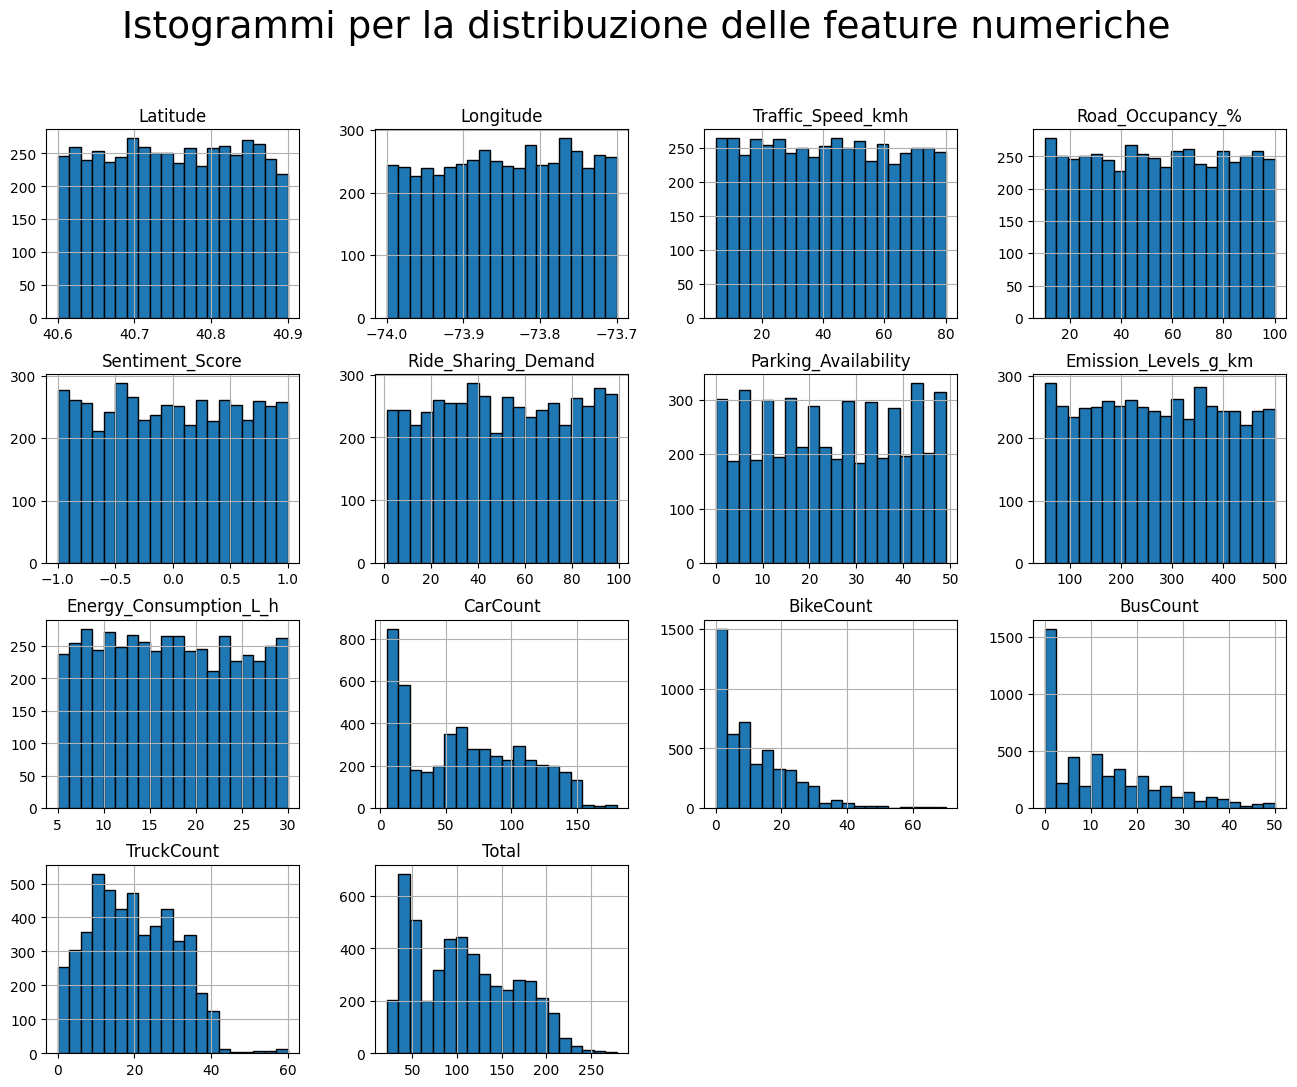

In [8]:
# Istogrammi per la distribuzione delle feature numeriche

# Elenco delle colonne da escludere
columns_to_exclude = ['Traffic_Light_State', 'Weather_Condition', 'Accident_Report', 'Traffic Situation']

# Creiamo il subset dei dati senza le feature da escludere
data_subset = dataset.drop(columns=columns_to_exclude)
data_subset.hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle("Istogrammi per la distribuzione delle feature numeriche", fontsize=27)
plt.show()

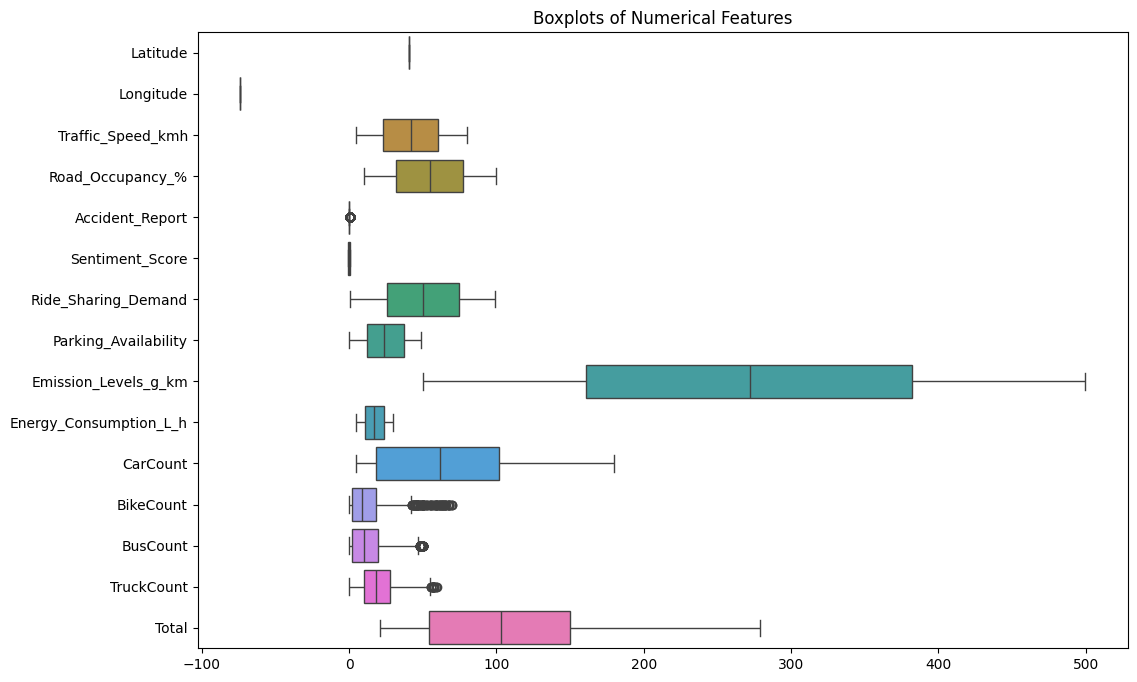

In [9]:
# Boxplot per le feature numeriche
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset, orient="h") #boxplot serve per vedere eventuali outliers
plt.title("Boxplots of Numerical Features")
plt.show()

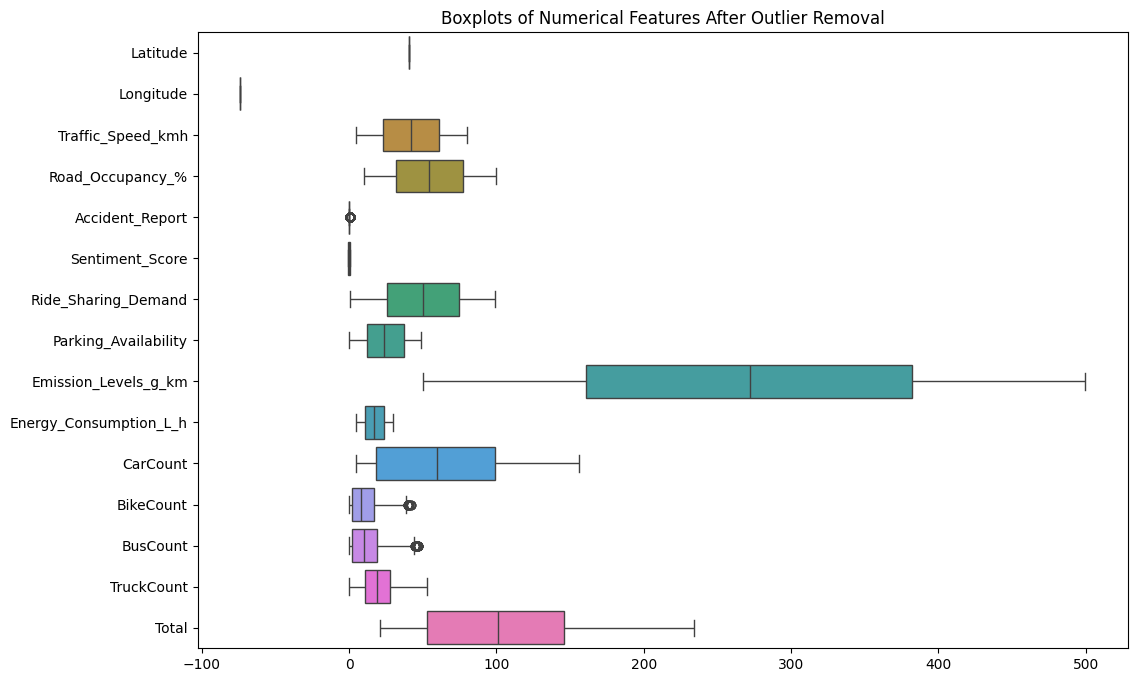

In [10]:
# Rimozione outlier per CarCount, BikeCount, TruckCount usando l'IQR
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean


dataset = remove_outliers_iqr(dataset, ['CarCount', 'BikeCount', 'TruckCount', 'BusCount'])
dataset.head()
# Verifica della presenza di outlier dopo la rimozione
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset, orient="h")
plt.title("Boxplots of Numerical Features After Outlier Removal")
plt.show()


In [11]:
# Assicurati che 'Timestamp' sia in formato datetime
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

# Giorno della settimana (0=Lunedì, 6=Domenica)
dataset['DayOfWeek'] = dataset['Timestamp'].dt.dayofweek

# Week-end (1 se sabato o domenica, 0 altrimenti)
dataset['Is_Weekend'] = dataset['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Giorno del mese
dataset['Day'] = dataset['Timestamp'].dt.day

# Mese
dataset['Month'] = dataset['Timestamp'].dt.month

# Ora del giorno
dataset['Hour'] = dataset['Timestamp'].dt.hour


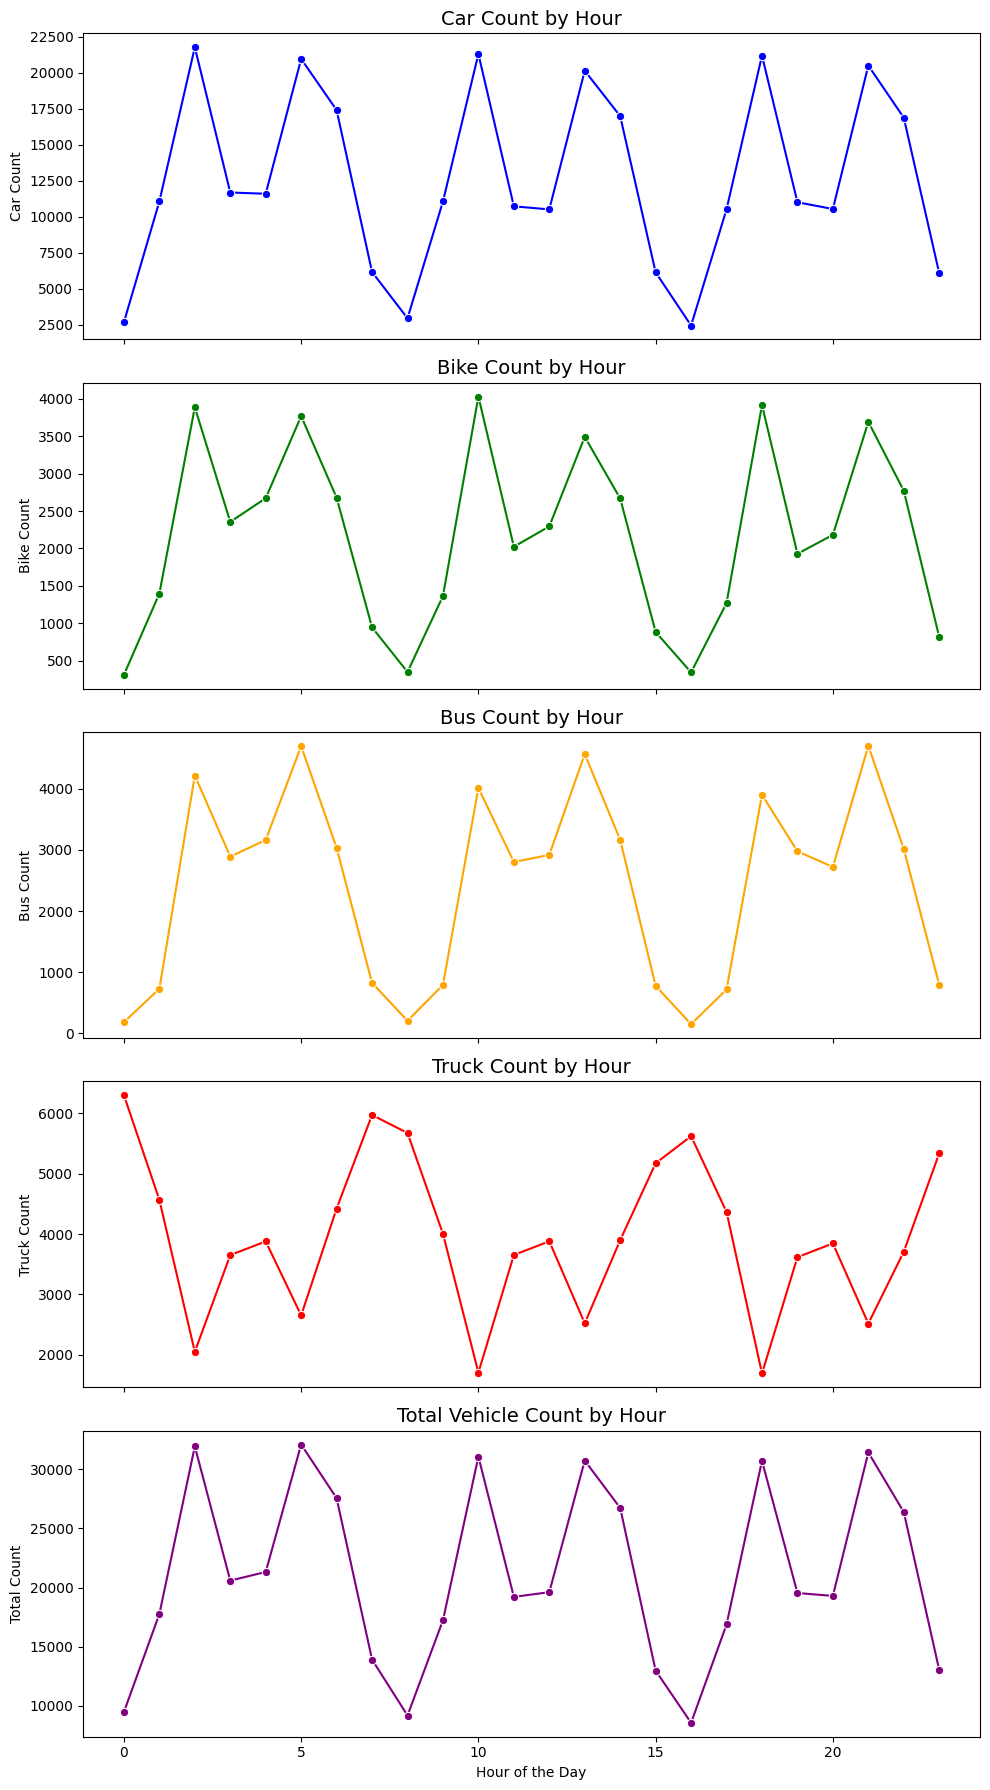

In [12]:

# Select only numeric columns for summation
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
# Group by hour and sum the vehicle counts
hourly_data = dataset.groupby('Hour')[numeric_columns].sum()

# Set the figure size and layout for separate plots
fig, axes = plt.subplots(5, 1, figsize=(10, 18), sharex=True)

# Plot for CarCount
sns.lineplot(x=hourly_data.index, y=hourly_data['CarCount'], ax=axes[0], color='blue', marker='o')
axes[0].set_title('Car Count by Hour', fontsize=14)
axes[0].set_ylabel('Car Count')

# Plot for BikeCount
sns.lineplot(x=hourly_data.index, y=hourly_data['BikeCount'], ax=axes[1], color='green', marker='o')
axes[1].set_title('Bike Count by Hour', fontsize=14)
axes[1].set_ylabel('Bike Count')

# Plot for BusCount
sns.lineplot(x=hourly_data.index, y=hourly_data['BusCount'], ax=axes[2], color='orange', marker='o')
axes[2].set_title('Bus Count by Hour', fontsize=14)
axes[2].set_ylabel('Bus Count')

# Plot for TruckCount
sns.lineplot(x=hourly_data.index, y=hourly_data['TruckCount'], ax=axes[3], color='red', marker='o')
axes[3].set_title('Truck Count by Hour', fontsize=14)
axes[3].set_ylabel('Truck Count')

# Plot for Total
sns.lineplot(x=hourly_data.index, y=hourly_data['Total'], ax=axes[4], color='purple', marker='o')
axes[4].set_title('Total Vehicle Count by Hour', fontsize=14)
axes[4].set_xlabel('Hour of the Day')
axes[4].set_ylabel('Total Count')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

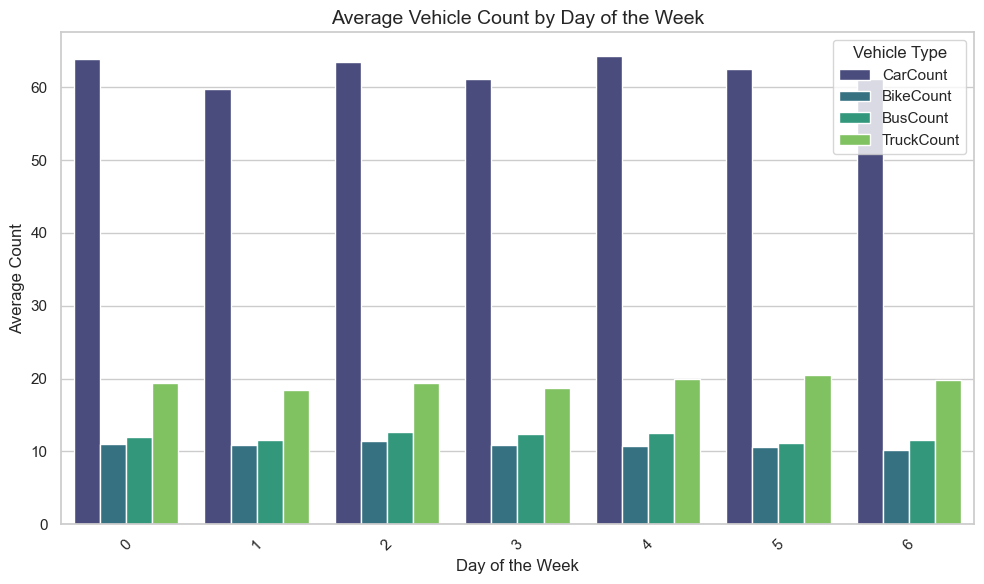

In [13]:
# Select only numeric columns, and then choose the specific columns you want
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

# Group by 'Day of the week' and calculate the mean for only the selected numeric columns
grouped_df = dataset.groupby('DayOfWeek')[numeric_columns].mean()

# Reset the index to make 'Day of the week' a column again
grouped_df = grouped_df.reset_index()

# Use the melt function to reshape the DataFrame for seaborn
grouped_df_melted = pd.melt(grouped_df, id_vars='DayOfWeek', var_name='Vehicle Type', value_name='Count')

# Set plot style and size
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the barplot
sns.barplot(x='DayOfWeek', y='Count', hue='Vehicle Type', data=grouped_df_melted, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Average Vehicle Count by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

latitudine e longitudine, bassa distribuzione => costante => non hanno info

In [14]:
dataset=dataset.drop(columns=['Latitude', 'Longitude'], axis=1)
dataset.head()

,Timestamp,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,...,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DayOfWeek,Is_Weekend,Day,Month,Hour
0,2024-03-01 00:00:00,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,...,2,2,24,41,normal,4,0,1,3,0
1,2024-03-01 00:05:00,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,...,1,1,36,52,normal,4,0,1,3,0
2,2024-03-01 00:10:00,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,...,2,2,32,46,normal,4,0,1,3,0
3,2024-03-01 00:15:00,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,...,2,2,36,50,normal,4,0,1,3,0
4,2024-03-01 00:20:00,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,...,2,1,34,48,normal,4,0,1,3,0


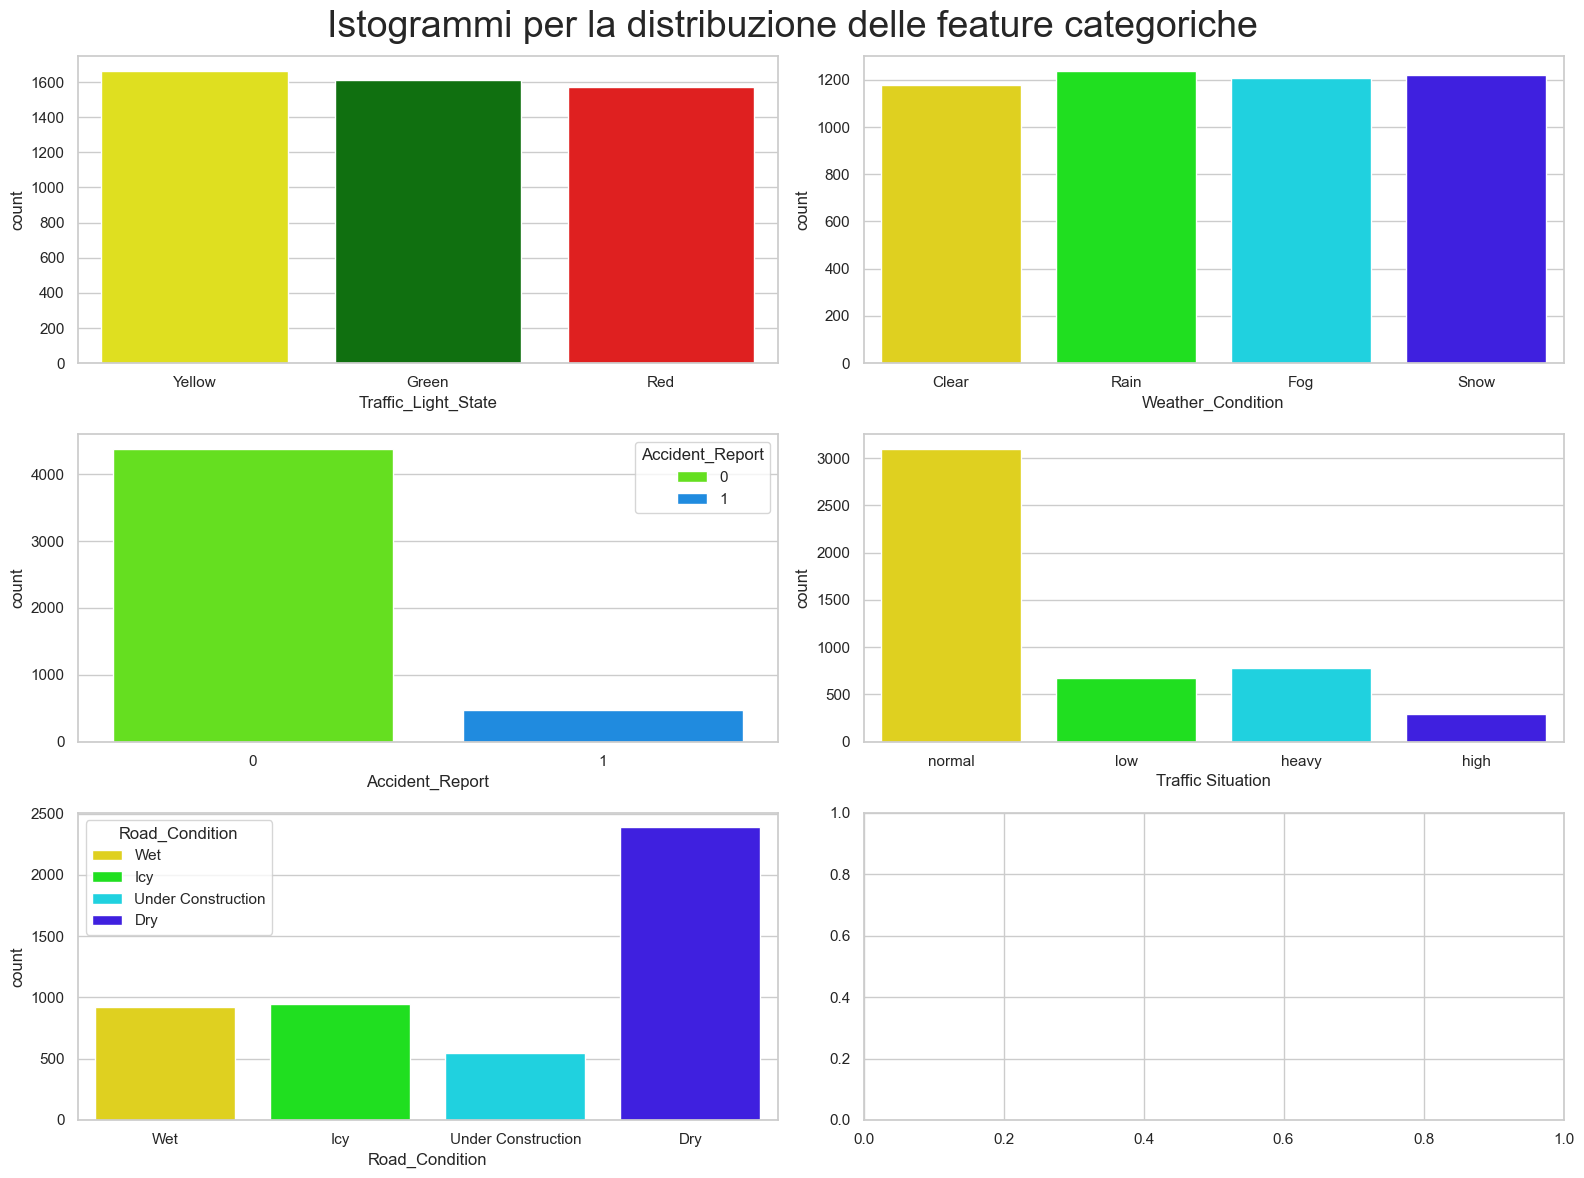

In [15]:
# Istogrammi per le features categoriche
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
sns.countplot(data=dataset, x='Traffic_Light_State', hue='Traffic_Light_State', ax=axes[0, 0], palette={'Red': 'red', 'Yellow': 'yellow', 'Green': 'green'})
sns.countplot(data=dataset, x='Weather_Condition', hue='Weather_Condition', ax=axes[0, 1], palette='gist_rainbow')
sns.countplot(data=dataset, x='Accident_Report', hue='Accident_Report', ax=axes[1, 0], palette='gist_rainbow')
sns.countplot(data=dataset, x='Traffic Situation', hue='Traffic Situation', ax=axes[1, 1], palette='gist_rainbow')
sns.countplot(data=dataset, x='Road_Condition', hue='Road_Condition', ax=axes[2, 0], palette='gist_rainbow')
plt.suptitle("Istogrammi per la distribuzione delle feature categoriche", fontsize=27)
plt.tight_layout()
plt.show()

Essendo che Accident_Report è troppo sbilanciato non può essere usata per fare previsioni. Lo stesso  vale per  Traffic_Condition e Road_Condition, ma essendo che ci sono utile per la nostra campagna di business li teniamo. Possiamo, per migliorare le predizioni del modello, bilanciare le classi della feature utilizzando SMOTE in fase di addestramento del modello.

## 2 - Preparazione dei dati

In [16]:
# cancellazione delle feature inutili per i nostri obiettivi
dataset=dataset.drop(columns=['Sentiment_Score', 'Ride_Sharing_Demand', 'Parking_Availability'], axis=1)
dataset.head()

,Timestamp,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DayOfWeek,Is_Weekend,Day,Month,Hour
0,2024-03-01 00:00:00,49.893435,82.652780,Yellow,Clear,0,450.760055,19.574337,Wet,13,2,2,24,41,normal,4,0,1,3,0
1,2024-03-01 00:05:00,22.383965,45.829298,Green,Clear,0,321.800341,5.385554,Wet,14,1,1,36,52,normal,4,0,1,3,0
2,2024-03-01 00:10:00,46.889699,82.772465,Green,Rain,0,231.152655,10.277477,Icy,10,2,2,32,46,normal,4,0,1,3,0
3,2024-03-01 00:15:00,5.730536,37.695567,Red,Fog,0,410.384292,29.243279,Under Construction,10,2,2,36,50,normal,4,0,1,3,0
4,2024-03-01 00:20:00,61.348034,22.313358,Red,Snow,0,364.466342,16.801459,Dry,11,2,1,34,48,normal,4,0,1,3,0


### Label encoding
Per poter calcolare la matrice di correlazione trasformiamo le variabili categoriche in numeriche

In [17]:
# Inizializziamo il LabelEncoder
encoder = LabelEncoder()

# Applichiamo il Label Encoding alle colonne categoriche
# codifica delle categotie in ordine alfabetico ma a noi non va bene per Traffic Situation

# Mappatura personalizzata per Traffic Situation
traffic_condition_mapping = {'normal': 0, 'low': 1, 'heavy': 2, 'high': 3}

# Applichiamo il mapping
dataset['Traffic Situation'] = dataset['Traffic Situation'].map(traffic_condition_mapping)

# Applichiamo il Label Encoding per le altre colonne
columns_to_encode = ['Traffic_Light_State', 'Weather_Condition', 'Road_Condition']
for col in columns_to_encode:
    dataset[col] = encoder.fit_transform(dataset[col])

dataset.head()

,Timestamp,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DayOfWeek,Is_Weekend,Day,Month,Hour
0,2024-03-01 00:00:00,49.893435,82.652780,2,0,0,450.760055,19.574337,3,13,2,2,24,41,0,4,0,1,3,0
1,2024-03-01 00:05:00,22.383965,45.829298,0,0,0,321.800341,5.385554,3,14,1,1,36,52,0,4,0,1,3,0
2,2024-03-01 00:10:00,46.889699,82.772465,0,2,0,231.152655,10.277477,1,10,2,2,32,46,0,4,0,1,3,0
3,2024-03-01 00:15:00,5.730536,37.695567,1,1,0,410.384292,29.243279,2,10,2,2,36,50,0,4,0,1,3,0
4,2024-03-01 00:20:00,61.348034,22.313358,1,3,0,364.466342,16.801459,0,11,2,1,34,48,0,4,0,1,3,0


Dall'analisi preliminare fatta, abbiamo notate che per Road_Condition mancano delle informazioni, allora facciamo un'azione di imputazione, aggiungendo i dati mancanti sostituendoli con la media dei valori.

In [18]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
dataset['Road_Condition'] = num_imputer.fit_transform(dataset[['Road_Condition']])
dataset['Road_Condition'].isnull().sum()

0

In [19]:

dataset.head()

,Timestamp,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DayOfWeek,Is_Weekend,Day,Month,Hour
0,2024-03-01 00:00:00,49.893435,82.652780,2,0,0,450.760055,19.574337,3.0,13,2,2,24,41,0,4,0,1,3,0
1,2024-03-01 00:05:00,22.383965,45.829298,0,0,0,321.800341,5.385554,3.0,14,1,1,36,52,0,4,0,1,3,0
2,2024-03-01 00:10:00,46.889699,82.772465,0,2,0,231.152655,10.277477,1.0,10,2,2,32,46,0,4,0,1,3,0
3,2024-03-01 00:15:00,5.730536,37.695567,1,1,0,410.384292,29.243279,2.0,10,2,2,36,50,0,4,0,1,3,0
4,2024-03-01 00:20:00,61.348034,22.313358,1,3,0,364.466342,16.801459,0.0,11,2,1,34,48,0,4,0,1,3,0


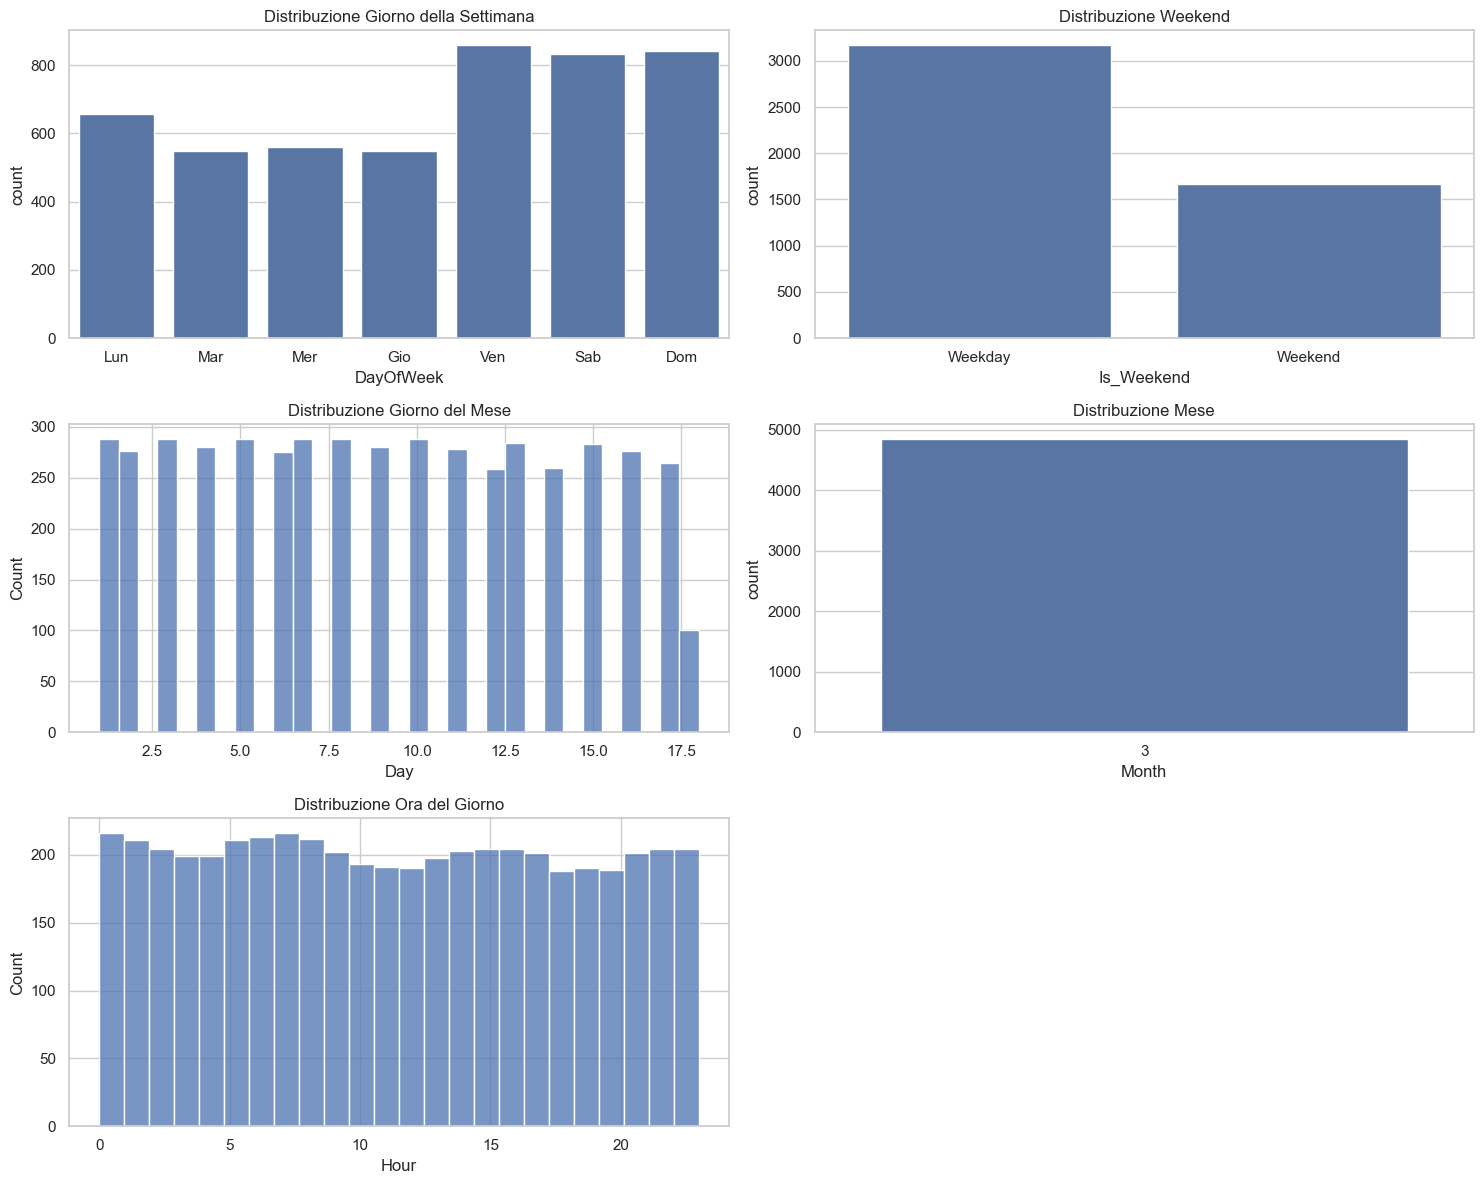

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile di seaborn
sns.set(style="whitegrid")

# Crea una figura con sottotrame
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Distribuzione del giorno della settimana
sns.countplot(x='DayOfWeek', data=dataset, ax=axes[0, 0])
axes[0, 0].set_title('Distribuzione Giorno della Settimana')
# Per asse con 7 giorni della settimana
axes[0, 0].set_xticks(range(7))  # Imposta i tick in 0-6
axes[0, 0].set_xticklabels(['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom'])

# Distribuzione weekend
sns.countplot(x='Is_Weekend', data=dataset, ax=axes[0, 1])
axes[0, 1].set_title('Distribuzione Weekend')
# Per asse con 2 valori: Weekday vs Weekend
axes[0, 1].set_xticks([0, 1])  # Imposta 2 tick: posizione 0 e 1
axes[0, 1].set_xticklabels(['Weekday', 'Weekend'])


# Distribuzione giorno del mese
sns.histplot(dataset['Day'], bins=31, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Distribuzione Giorno del Mese')

# Distribuzione mese
sns.countplot(x='Month', data=dataset, ax=axes[1, 1])
axes[1, 1].set_title('Distribuzione Mese')

# Distribuzione ora del giorno
sns.histplot(dataset['Hour'], bins=24, kde=False, ax=axes[2, 0])
axes[2, 0].set_title('Distribuzione Ora del Giorno')

# Nascondi il subplot vuoto
axes[2, 1].axis('off')

# Mostra i grafici
plt.tight_layout()
plt.show()


In [21]:
dataset = dataset.drop(columns=['Month', 'Timestamp'], errors='ignore')

In [22]:
# Verifichiamo l'aggiornamento delle colonne
print(f"{dataset.dtypes}\n")

Traffic_Speed_kmh         float64
Road_Occupancy_%          float64
Traffic_Light_State         int32
Weather_Condition           int32
Accident_Report             int64
Emission_Levels_g_km      float64
Energy_Consumption_L_h    float64
Road_Condition            float64
CarCount                    int64
BikeCount                   int64
BusCount                    int64
TruckCount                  int64
Total                       int64
Traffic Situation           int64
DayOfWeek                   int32
Is_Weekend                  int64
Day                         int32
Hour                        int32
dtype: object



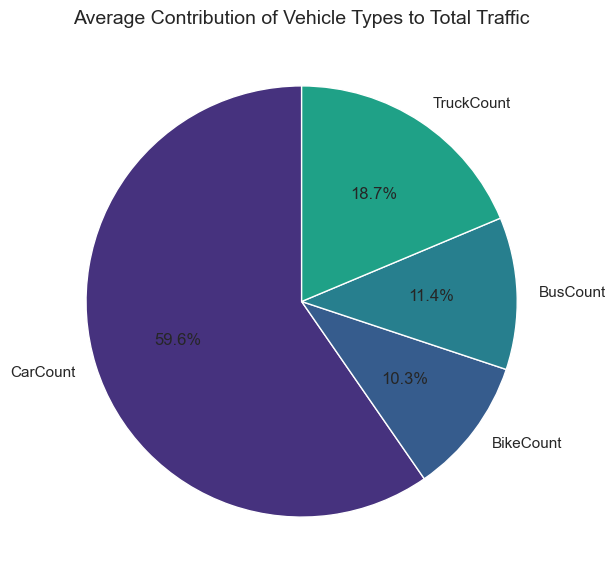

In [23]:
# Pie chart for average contribution of each vehicle type to total traffic
average_vehicle_counts = dataset[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

plt.figure(figsize=(7, 7))
plt.pie(average_vehicle_counts, labels=average_vehicle_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Average Contribution of Vehicle Types to Total Traffic', fontsize=14)
plt.show()

In [24]:
df_cong = dataset[['Total', 'Road_Occupancy_%', 'Traffic_Speed_kmh']].copy()

# Normalizziamo dei dati
epsilon = 1e-6
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_cong)
df_scaled = df_scaled * (1 - 2 * epsilon) + epsilon  # evitare valori 0 e 1
df_cong[['Total_norm', 'Road_Occupancy_norm','Traffic_Speed_kmh_norm']] = df_scaled

#calcolo dell'indice di congestione
dataset['Congestion_Index'] = 0.4 * df_cong['Total_norm'] + 0.6 * df_cong['Road_Occupancy_norm']

#calcoliamo la densità di traffico
#dataset['Traffic_Density'] = df_cong['Total_norm'] / df_cong['Road_Occupancy_norm']

# calcoliamo l'efficenza del traffico, cioè quanto velocemente scorre il traffico rispetto al numero di veicoli
#dataset['Traffic_Efficiency'] = df_cong['Traffic_Speed_kmh_norm'] / df_cong['Total_norm']

dataset.head()

,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DayOfWeek,Is_Weekend,Day,Hour,Congestion_Index
0,49.893435,82.652780,2,0,0,450.760055,19.574337,3.0,13,2,2,24,41,0,4,0,1,0,0.521906
1,22.383965,45.829298,0,0,0,321.800341,5.385554,3.0,14,1,1,36,52,0,4,0,1,0,0.297059
2,46.889699,82.772465,0,2,0,231.152655,10.277477,1.0,10,2,2,32,46,0,4,0,1,0,0.532093
3,5.730536,37.695567,1,1,0,410.384292,29.243279,2.0,10,2,2,36,50,0,4,0,1,0,0.239075
4,61.348034,22.313358,1,3,0,364.466342,16.801459,0.0,11,2,1,34,48,0,4,0,1,0,0.132765


In [25]:
# calcolo statistiche descrittive
dataset.describe()

,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DayOfWeek,Is_Weekend,Day,Hour,Congestion_Index
count,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,42.182696,54.702742,1.011563,1.516415,0.096015,272.422171,17.386396,1.026430,62.438365,10.745612,11.960562,19.559777,104.704316,0.642577,3.292381,0.345241,9.102003,11.359488,0.455194
std,21.663092,26.145556,0.822212,1.113679,0.294642,130.030186,7.202123,1.201216,43.021973,9.621917,11.547036,10.542820,52.471539,0.957190,2.032470,0.475496,5.004740,6.954106,0.200069
min,5.002789,10.005031,0.000000,0.000000,0.000000,50.136855,5.003787,0.000000,5.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.015925
25%,23.343441,32.075425,0.000000,1.000000,0.000000,161.045397,11.122916,0.000000,18.000000,2.000000,2.000000,11.000000,53.000000,0.000000,2.000000,0.000000,5.000000,5.000000,0.302004
50%,42.247838,54.542664,1.000000,2.000000,0.000000,272.187725,17.246836,1.000000,60.000000,8.000000,10.000000,19.000000,101.000000,0.000000,4.000000,0.000000,9.000000,11.000000,0.459007
75%,60.775482,77.589293,2.000000,3.000000,0.000000,382.264548,23.542659,2.000000,99.000000,17.000000,19.000000,28.000000,146.000000,1.000000,5.000000,1.000000,13.000000,17.000000,0.602265
max,79.997556,99.999729,2.000000,3.000000,1.000000,499.922663,29.995416,4.000000,156.000000,42.000000,47.000000,53.000000,234.000000,3.000000,6.000000,1.000000,18.000000,23.000000,0.977794


### Matrice di correlazione

Matrice di correlazione:



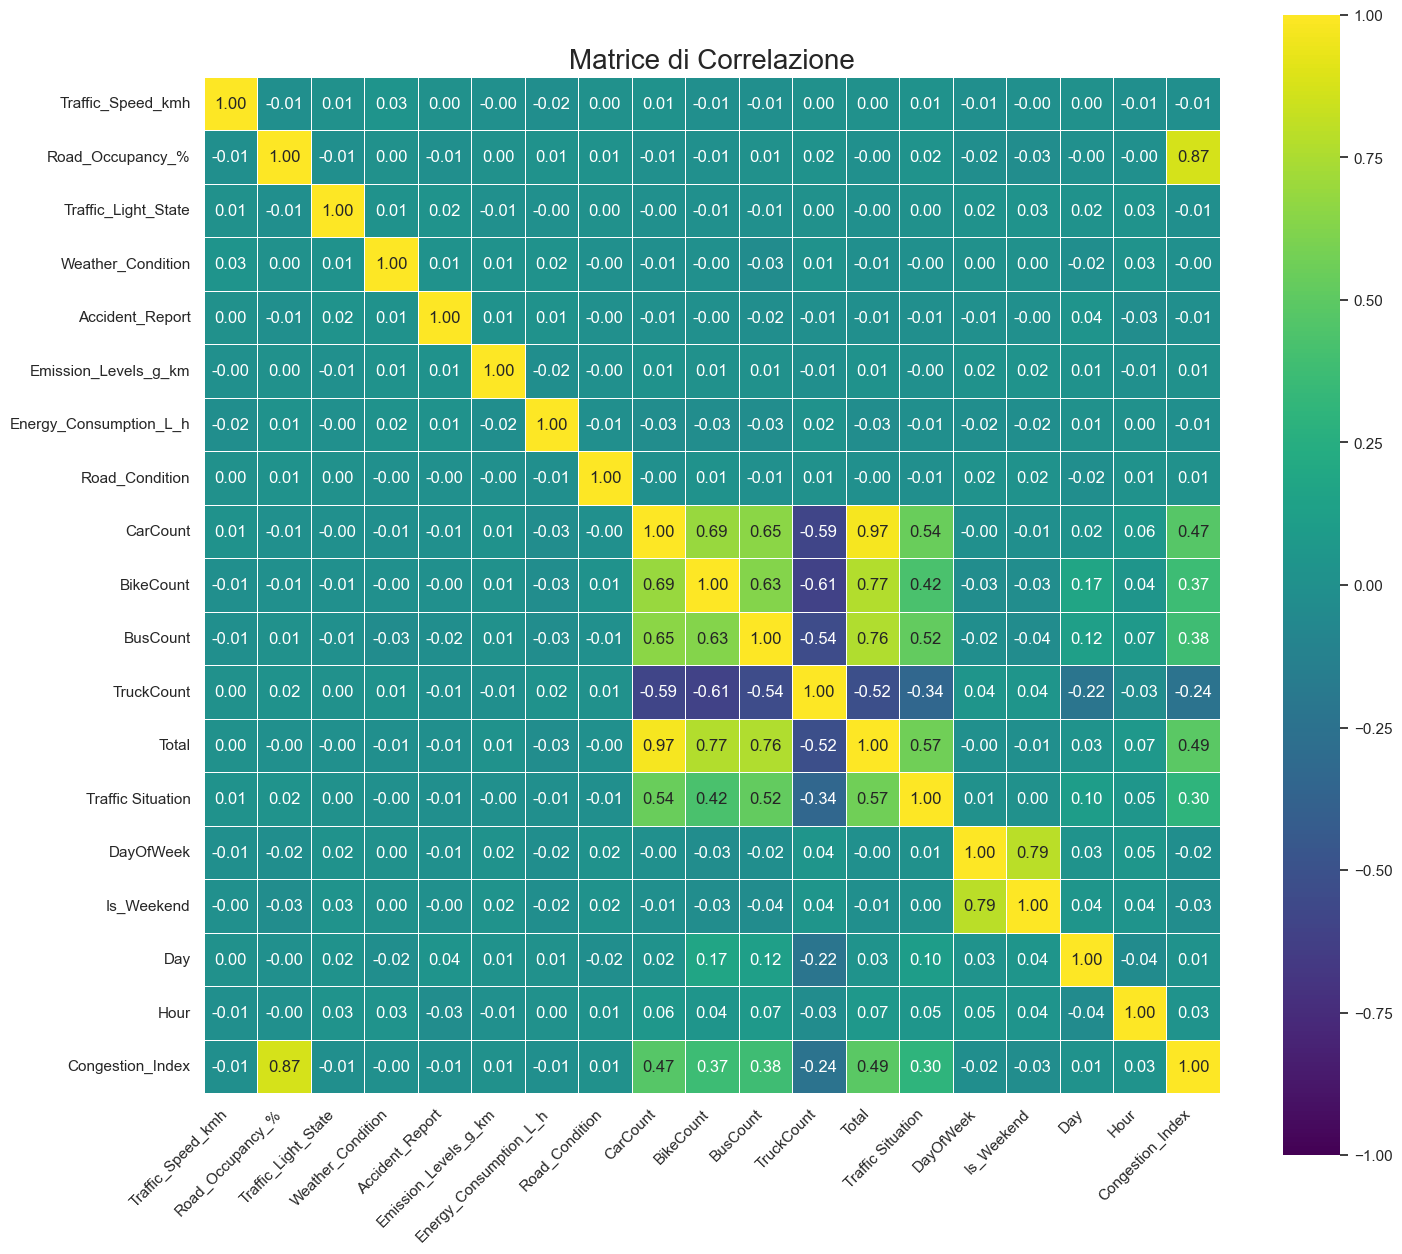

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Matrice di correlazione:\n')
corr_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(15, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='viridis',
    square=True,
    linewidths=0.5,
    linecolor='white',
    vmax=1,
    vmin=-1,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matrice di Correlazione", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [27]:
# eliminiamo le feature troppe correlate
dataset = dataset.drop(columns=['Total', 'Road_Occupancy_%', 'Traffic_Speed_kmh'], axis=1)
dataset.head()

,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation,DayOfWeek,Is_Weekend,Day,Hour,Congestion_Index
0,2,0,0,450.760055,19.574337,3.0,13,2,2,24,0,4,0,1,0,0.521906
1,0,0,0,321.800341,5.385554,3.0,14,1,1,36,0,4,0,1,0,0.297059
2,0,2,0,231.152655,10.277477,1.0,10,2,2,32,0,4,0,1,0,0.532093
3,1,1,0,410.384292,29.243279,2.0,10,2,2,36,0,4,0,1,0,0.239075
4,1,3,0,364.466342,16.801459,0.0,11,2,1,34,0,4,0,1,0,0.132765


## 3 - CLASSIFICAZIONE DELLO STATO DEL TRAFFICO

Proviamo a fare una prima classificazione senza applicare particolari tecniche di miglioramento del modello.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = dataset.drop(columns=['Traffic Situation'])  # Features
y = dataset["Traffic Situation"]  # Target

# Divisione in train, validation e test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


X_train, y_train: dati per addestrare il modello
X_val, y_val: dati per validazione (tuning iperparametri)
X_test, y_test: dati per valutazione finale del modello
La validation serve per ottimizzare il modello senza guardare i dati di test, permettendo di scegliere i migliori iperparametri e prevenire overfitting.
Il test set resta "incontaminato" per una valutazione oggettiva delle performance finali.

Inizializzazione e addestramento Random Forest impostiamo un random_state per la riproducibilità essendo un modello stocastico, il risultato può variare ad ogni esecuzion

Classification Report:
              precision    recall  f1-score   support

      normal       0.94      0.98      0.96       614
         low       0.97      0.94      0.96       151
       heavy       0.92      0.97      0.94       148
        high       1.00      0.54      0.70        56

    accuracy                           0.95       969
   macro avg       0.96      0.86      0.89       969
weighted avg       0.95      0.95      0.94       969



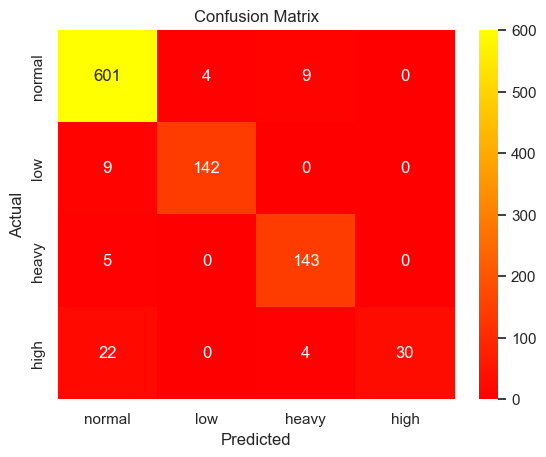

In [29]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

#Predizione e valutazione
y_pred = rf_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["normal", "low", "heavy", "high"]))

#Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='autumn', xticklabels=["normal", "low", "heavy", "high"], yticklabels=["normal", "low", "heavy", "high"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Da una prima analisi, il modello sembra buono. Ha buona precision, recall e f1-score per tutte le classi della variabile target. Anche dalla matrice di confusione vediamo che classifica abbastanza bene tutte le classi. La classe low è un pò più scarsetta rispetto alle altre, ma questo è dovuto al fatto che le classi, come abbiamo visto dai grafici, sono sblianciante e in particolare per la classe low.

### Analisi della foresta
Andiamo a calcolare alcune statistiche della foresta che il modello ha creato per capire se il modello
- è troppo complesso => troppe foglie => troppe regole per classificare => overfitting
- è troppo semplice => non coglie tutti i dettagli che dovrebbe dai dati
- ha overfittato, dovuta ad una profondità troppo elevata degli alberi => impara i dati di train

 Analisi della Random Forest
- Numero di alberi nella foresta: 100
- Profondità media: 18.13
- Numero medio di foglie: 274.58
- Profondità massima: 25
- Profondità minima: 14


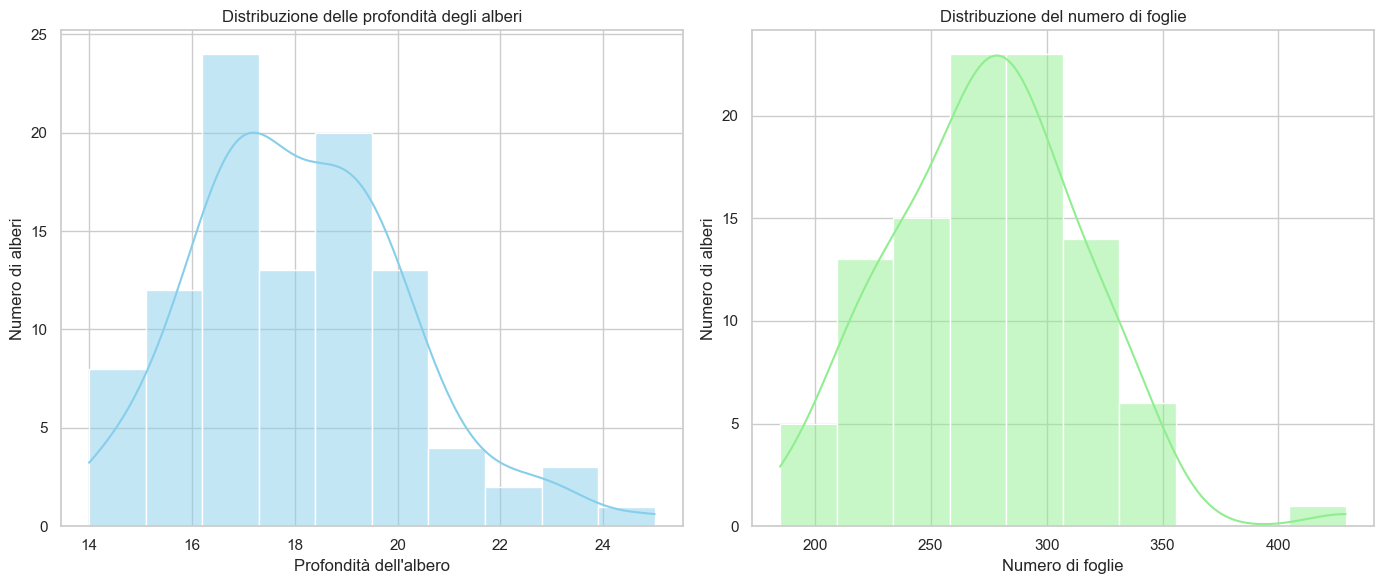

In [30]:
# Calcolo statistiche globali sugli alberi della foresta
depths = [tree.get_depth() for tree in rf_clf.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf.estimators_]

print(" Analisi della Random Forest")
print(f"- Numero di alberi nella foresta: {len(rf_clf.estimators_)}")
print(f"- Profondità media: {sum(depths) / len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves) / len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura con due sottografici
plt.figure(figsize=(14, 6))

# Distribuzione della profondità
plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="skyblue")
plt.title("Distribuzione delle profondità degli alberi")
plt.xlabel("Profondità dell'albero")
plt.ylabel("Numero di alberi")

# Distribuzione del numero di foglie
plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="lightgreen")
plt.title("Distribuzione del numero di foglie")
plt.xlabel("Numero di foglie")
plt.ylabel("Numero di alberi")

# Mostra i grafici
plt.tight_layout()
plt.show()

|--- CarCount <= 115.50
|   |--- Day <= 11.50
|   |   |--- Hour <= 20.50
|   |   |   |--- TruckCount <= 18.50
|   |   |   |   |--- CarCount <= 80.50
|   |   |   |   |   |--- BusCount <= 15.50
|   |   |   |   |   |   |--- TruckCount <= 14.50
|   |   |   |   |   |   |   |--- Energy_Consumption_L_h <= 16.57
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Energy_Consumption_L_h >  16.57
|   |   |   |   |   |   |   |   |--- Traffic_Light_State <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Traffic_Light_State >  0.50
|   |   |   |   |   |   |   |   |   |--- CarCount <= 74.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- CarCount >  74.50
|   |   |   |   |   |   |   |   |   |   |--- Is_Weekend <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- Is_Weekend >  0.50
|   |   |   |   |   |   |   |   |   |

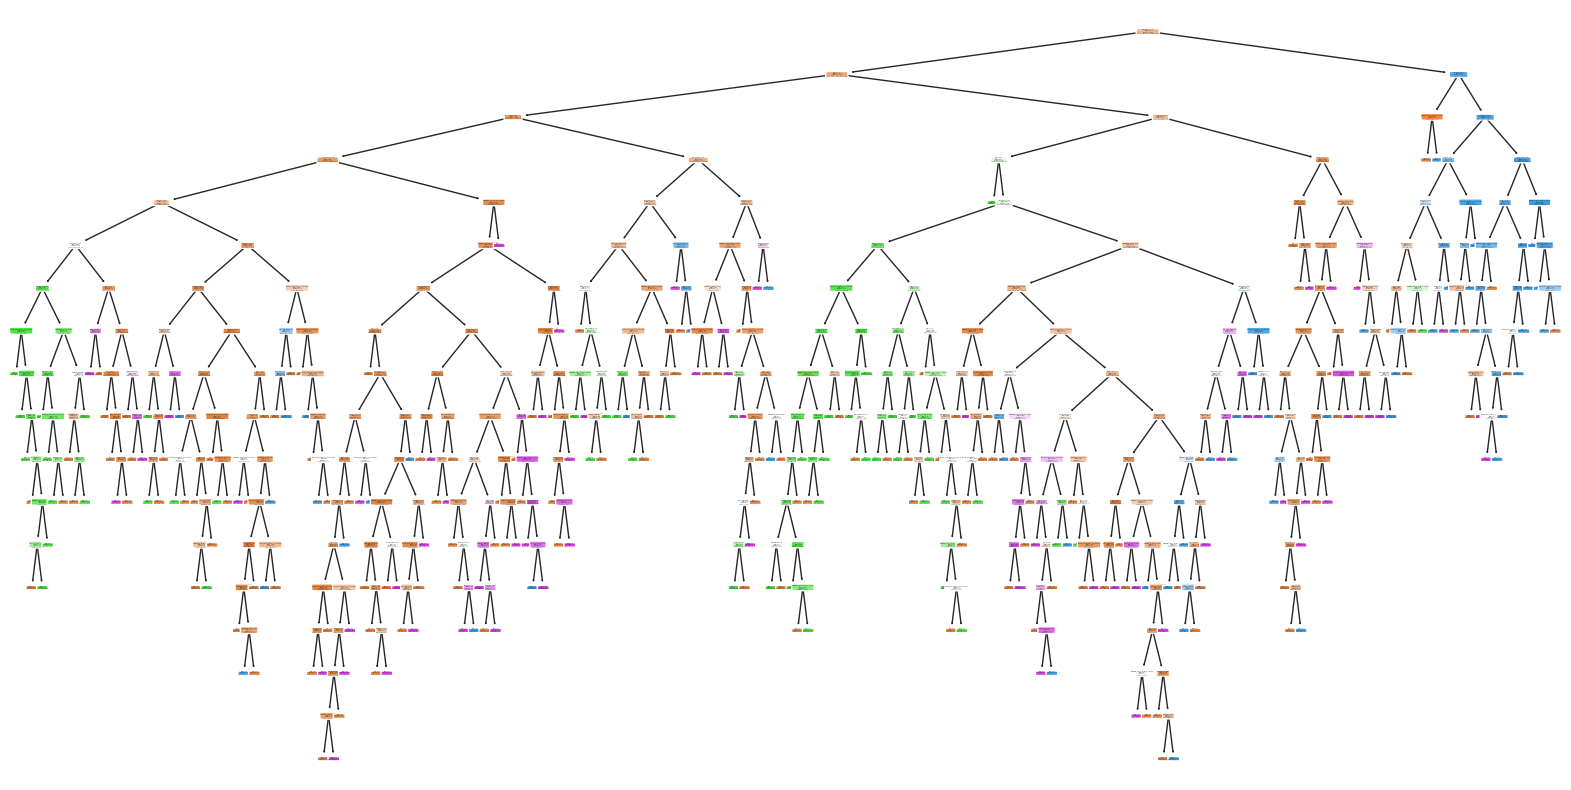

In [31]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

tree = rf_clf.estimators_[0]
print(export_text(tree, feature_names=list(X.columns)))
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()


Già delle statistiche possiamo vedere, che è andato in overfitting... troppe foglie, eccessiva profondità, ma per avere la certezza assoluta, valutiamo l'accuratezza tra train e test set.
Se accurancy_train>>accurancy_test => overfitting

In [32]:
print("Train accuracy:", rf_clf.score(X_train, y_train))
print("Test accuracy:", rf_clf.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.9453044375644994


Vuol dire che il modello ha imparato perfettamente i dati di training, ma quando lo applichiamo a dati mai visti prima l’accuratezza scende a 0.923.

=> il modello è troppo complesso, ha “memorizzato” i dati di training e non generalizza  bene su dati nuovi.

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

cv_scores = cross_val_score(rf_clf, X, y, cv=kfold)
print(f"Cross-Validation Accuracy: {cv_scores}")
print(f'Precisione media: {cv_scores.mean():.2%}')
print(f'Deviazione standard: {cv_scores.std():.2%}')

Cross-Validation Accuracy: [0.95463918 0.93814433 0.95463918 0.95661157 0.94421488 0.95867769
 0.95247934 0.96280992 0.94008264 0.93801653]
Precisione media: 95.00%
Deviazione standard: 0.87%


Il modello generalizza bene, dando performance stabili e affidabili su diversi subset del dataset.
MA... il problema è che va in overfitting, e le metriche sulla classe low sono scarsette per via del fatto che ha pochi data point.

### MIGLIORAMENTO 1
Cerchiamo di ridurre l'overfitting andando a
1. fare **feature importance** => riduciamo le feature => riduciamo la dimensionalià dell'albero
2. **SMOTE** per bilanciare le classi minoritarie


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       614
           1       0.96      0.97      0.96       151
           2       0.89      0.97      0.93       148
           3       0.83      0.79      0.81        56

    accuracy                           0.95       969
   macro avg       0.91      0.92      0.92       969
weighted avg       0.95      0.95      0.95       969



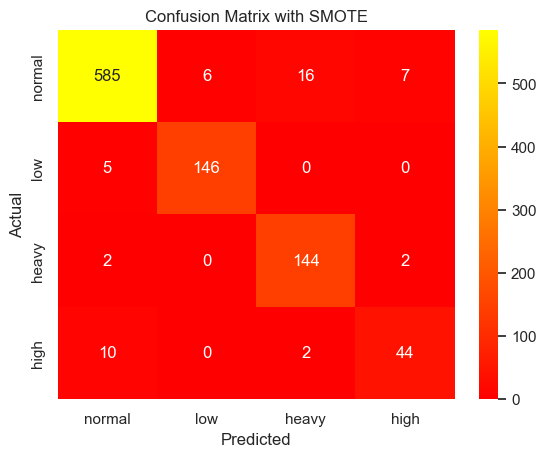

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_cfl_smote = RandomForestClassifier()
rf_cfl_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_cfl_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

#Matrice di confusione
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='autumn', xticklabels=["normal", "low", "heavy", "high"], yticklabels=["normal", "low", "heavy", "high"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with SMOTE")
plt.show()

 Analisi della Random Forest
- Numero di alberi nella foresta: 100
- Profondità media: 18.13
- Numero medio di foglie: 274.58
- Profondità massima: 25
- Profondità minima: 14


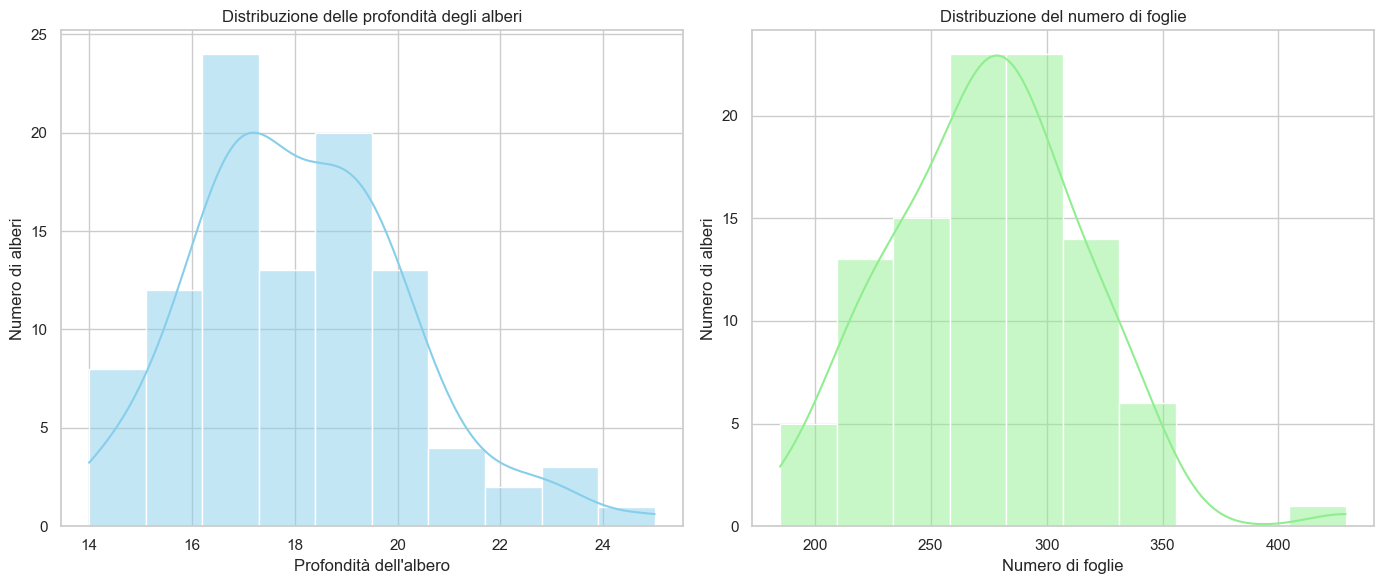

In [35]:
# Calcolo statistiche globali sugli alberi della foresta
depths = [tree.get_depth() for tree in rf_clf.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf.estimators_]

print(" Analisi della Random Forest")
print(f"- Numero di alberi nella foresta: {len(rf_clf.estimators_)}")
print(f"- Profondità media: {sum(depths) / len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves) / len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura con due sottografici
plt.figure(figsize=(14, 6))

# Distribuzione della profondità
plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="skyblue")
plt.title("Distribuzione delle profondità degli alberi")
plt.xlabel("Profondità dell'albero")
plt.ylabel("Numero di alberi")

# Distribuzione del numero di foglie
plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="lightgreen")
plt.title("Distribuzione del numero di foglie")
plt.xlabel("Numero di foglie")
plt.ylabel("Numero di alberi")

# Mostra i grafici
plt.tight_layout()
plt.show()

|--- CarCount <= 109.50
|   |--- CarCount <= 59.50
|   |   |--- Day <= 10.50
|   |   |   |--- BikeCount <= 2.50
|   |   |   |   |--- Road_Condition <= 0.04
|   |   |   |   |   |--- Congestion_Index <= 0.25
|   |   |   |   |   |   |--- Emission_Levels_g_km <= 428.29
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Emission_Levels_g_km >  428.29
|   |   |   |   |   |   |   |--- Emission_Levels_g_km <= 433.03
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Emission_Levels_g_km >  433.03
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Congestion_Index >  0.25
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Road_Condition >  0.04
|   |   |   |   |   |--- CarCount <= 48.50
|   |   |   |   |   |   |--- Road_Condition <= 0.93
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Road_Condition >  0.93
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- CarCount >  

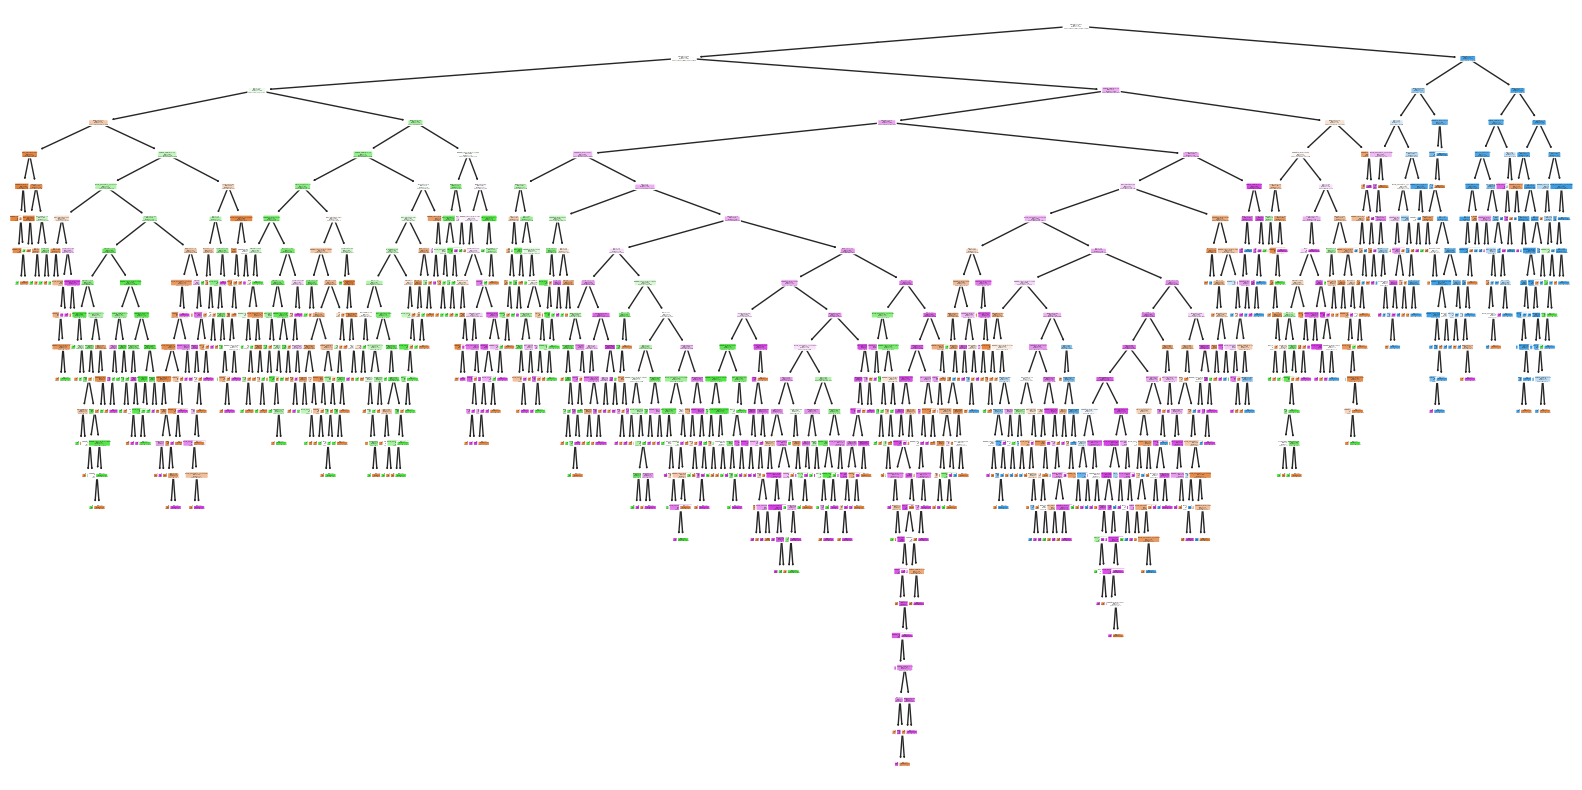

In [36]:
tree = rf_cfl_smote.estimators_[0]
print(export_text(tree, feature_names=list(X.columns)))
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [37]:
print("Train accuracy:", rf_cfl_smote.score(X_train, y_train))
print("Test accuracy:", rf_cfl_smote.score(X_test, y_test))

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

cv_scores = cross_val_score(rf_cfl_smote, X, y, cv=kfold)
print(f"Cross-Validation Accuracy: {cv_scores}")
print(f'Precisione media: {cv_scores.mean():.2%}')
print(f'Deviazione standard: {cv_scores.std():.2%}')

Train accuracy: 1.0
Test accuracy: 0.9484004127966976
Cross-Validation Accuracy: [0.95670103 0.93402062 0.95051546 0.95454545 0.95041322 0.9607438
 0.95661157 0.9607438  0.94214876 0.92975207]
Precisione media: 94.96%
Deviazione standard: 1.03%


FEATURE IMPORTANCE + SMOTE

                   Feature  Importance
6                 CarCount    0.293139
9               TruckCount    0.219355
8                 BusCount    0.180402
7                BikeCount    0.083131
14        Congestion_Index    0.056549
4   Energy_Consumption_L_h    0.031677
3     Emission_Levels_g_km    0.030597
12                     Day    0.027048
13                    Hour    0.026703
10               DayOfWeek    0.015025


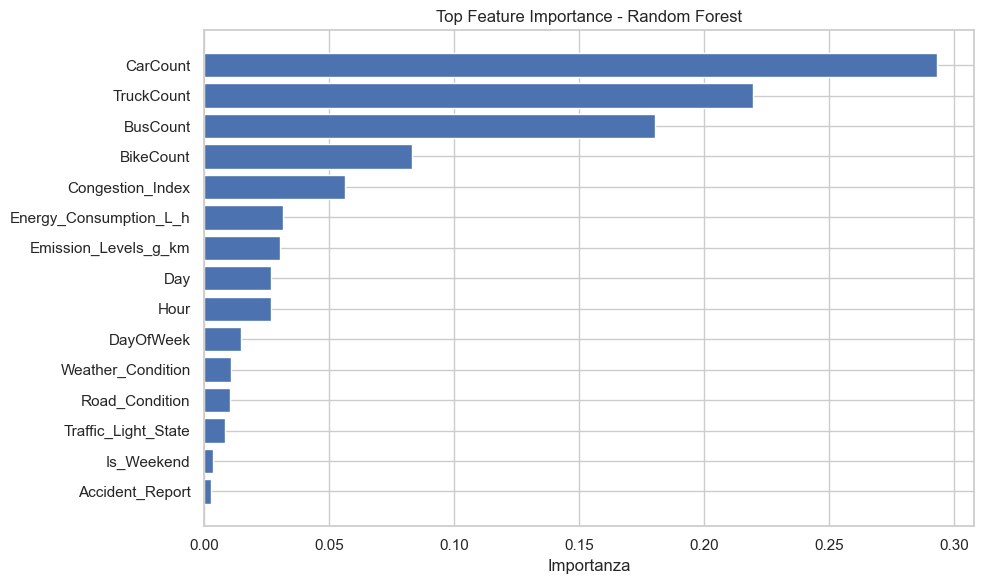

In [38]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns 

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

print(feat_imp.head(10))

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][::-1], feat_imp['Importance'][::-1])
plt.xlabel("Importanza")
plt.title("Top Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

Usaimo RFE èer selezionrea le feature più rilevanti in modo iterativo, allenando il modello e rimuovendo le meno importanti ad ogni ciclo.

In [39]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=rf_clf, n_features_to_select=9, step=1)
selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]
print("Feature selezionate da RFE:")
print(selected_features)

# Riduciamo il dataset
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

Feature selezionate da RFE:
Index(['Emission_Levels_g_km', 'Energy_Consumption_L_h', 'CarCount',
       'BikeCount', 'BusCount', 'TruckCount', 'Day', 'Hour',
       'Congestion_Index'],
      dtype='object')


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       614
           1       0.98      0.98      0.98       151
           2       0.95      0.96      0.95       148
           3       0.90      0.77      0.83        56

    accuracy                           0.97       969
   macro avg       0.95      0.92      0.93       969
weighted avg       0.97      0.97      0.97       969

Accuracy: 0.9659442724458205


<Axes: >

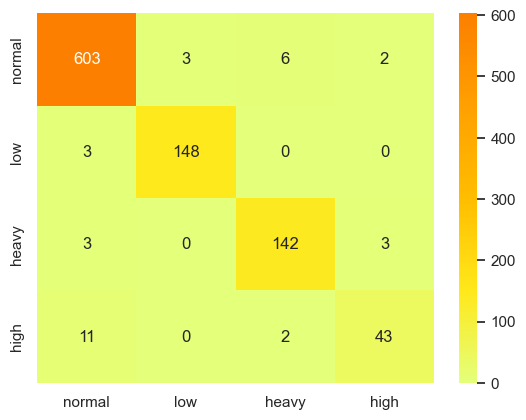

In [40]:
from sklearn.metrics import classification_report, accuracy_score

# training con le feature selezionate
rf_clf_rfe = RandomForestClassifier(random_state=42)
rf_clf_rfe.fit(X_train_rfe, y_train)


y_pred_rfe= rf_clf_rfe.predict(X_test_rfe)
print(classification_report(y_test, y_pred_rfe))
print("Accuracy:", accuracy_score(y_test, y_pred_rfe))

cm_rfe = confusion_matrix(y_test, y_pred_rfe)
sns.heatmap(cm_rfe, annot=True, fmt='d', cmap='Wistia', 
            xticklabels=["normal", "low", "heavy", "high"], 
            yticklabels=["normal", "low", "heavy", "high"])


 Analisi della Random Forest
- Numero di alberi nella foresta: 100
- Profondità media: 15.52
- Numero medio di foglie: 175.31
- Profondità massima: 24
- Profondità minima: 13


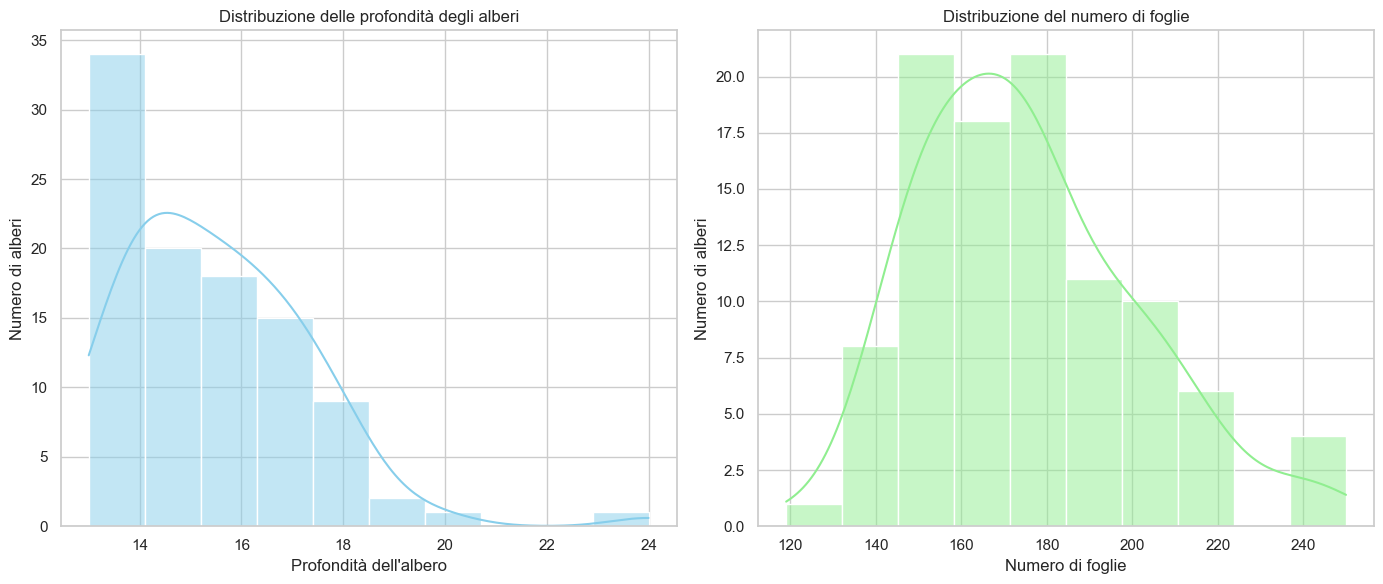

In [41]:
# Calcolo statistiche globali sugli alberi della foresta
depths = [tree.get_depth() for tree in rf_clf_rfe.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf_rfe.estimators_]

print(" Analisi della Random Forest")
print(f"- Numero di alberi nella foresta: {len(rf_clf_rfe.estimators_)}")
print(f"- Profondità media: {sum(depths) / len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves) / len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura con due sottografici
plt.figure(figsize=(14, 6))

# Distribuzione della profondità
plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="skyblue")
plt.title("Distribuzione delle profondità degli alberi")
plt.xlabel("Profondità dell'albero")
plt.ylabel("Numero di alberi")

# Distribuzione del numero di foglie
plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="lightgreen")
plt.title("Distribuzione del numero di foglie")
plt.xlabel("Numero di foglie")
plt.ylabel("Numero di alberi")

# Mostra i grafici
plt.tight_layout()
plt.show()

|--- CarCount <= 115.50
|   |--- TruckCount <= 18.50
|   |   |--- BusCount <= 11.50
|   |   |   |--- CarCount <= 80.50
|   |   |   |   |--- Energy_Consumption_L_h <= 5.28
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Energy_Consumption_L_h >  5.28
|   |   |   |   |   |--- BikeCount <= 26.50
|   |   |   |   |   |   |--- TruckCount <= 15.50
|   |   |   |   |   |   |   |--- Energy_Consumption_L_h <= 9.42
|   |   |   |   |   |   |   |   |--- CarCount <= 69.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- CarCount >  69.00
|   |   |   |   |   |   |   |   |   |--- TruckCount <= 13.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- TruckCount >  13.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Energy_Consumption_L_h >  9.42
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- TruckCount >  15.50
|   |   |   |   |   |   |  

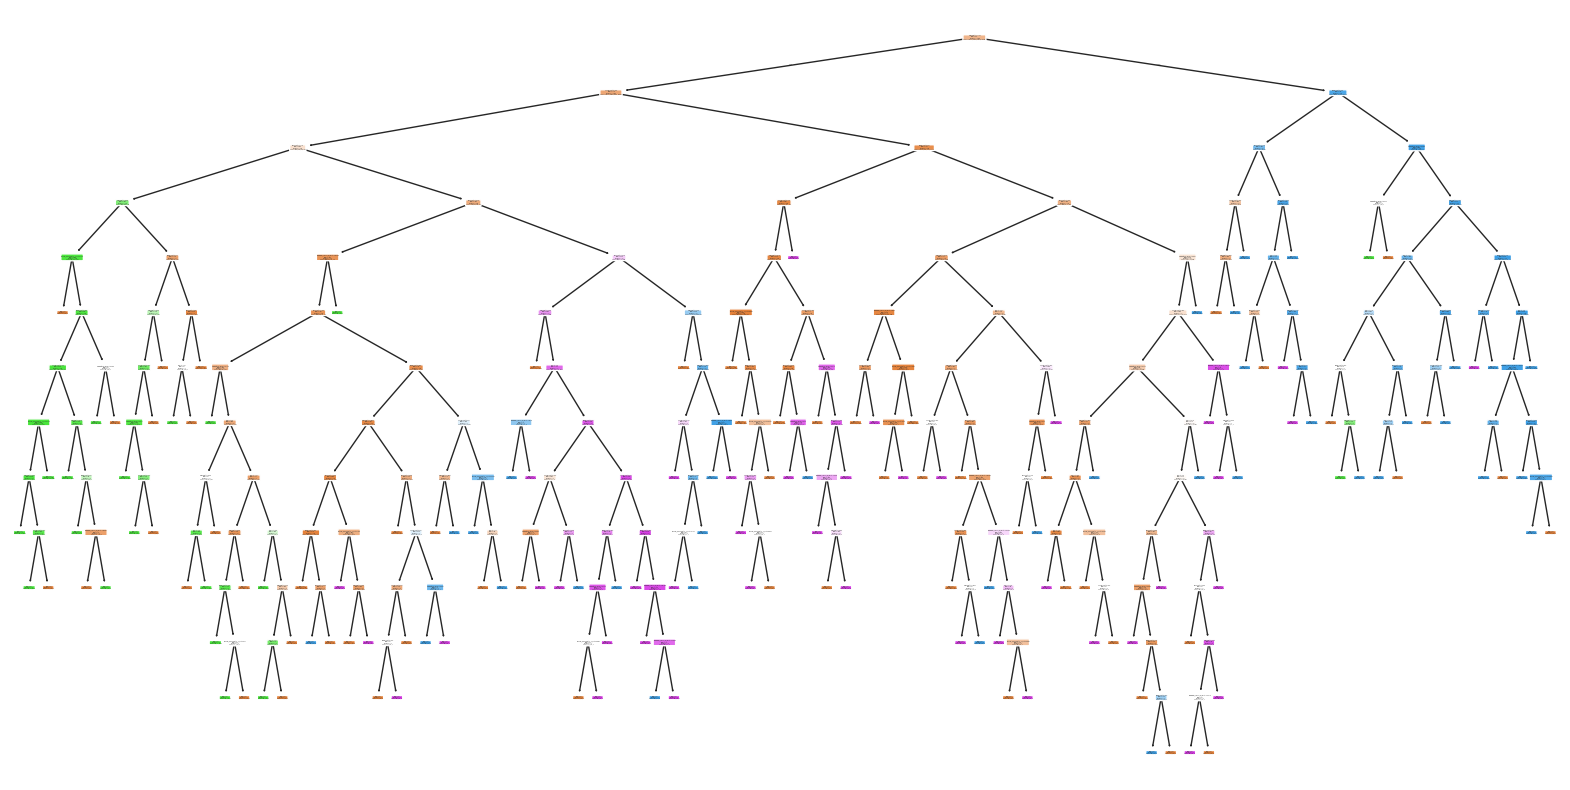

In [42]:
tree_rfe = rf_clf_rfe.estimators_[0]
print(export_text(tree_rfe, feature_names=list(X_train_rfe.columns)))
plt.figure(figsize=(20,10))
plot_tree(tree_rfe, feature_names=X_train_rfe.columns, filled=True, rounded=True)
plt.show()

In [43]:
print("Train accuracy:", rf_clf_rfe.score(X_train_rfe, y_train))
print("Test accuracy:", rf_clf_rfe.score(X_test_rfe, y_test))

Train accuracy: 1.0
Test accuracy: 0.9659442724458205


Proviamo SMOTE sulle feature selected, il modello va ancora in overfitting. :|

In [44]:
# Applichiamo SMOTE solo sulle feature selezionate da RFE
X_train_rfe_smote, y_train_rfe_smote = SMOTE(random_state=42).fit_resample(X_train_rfe, y_train)

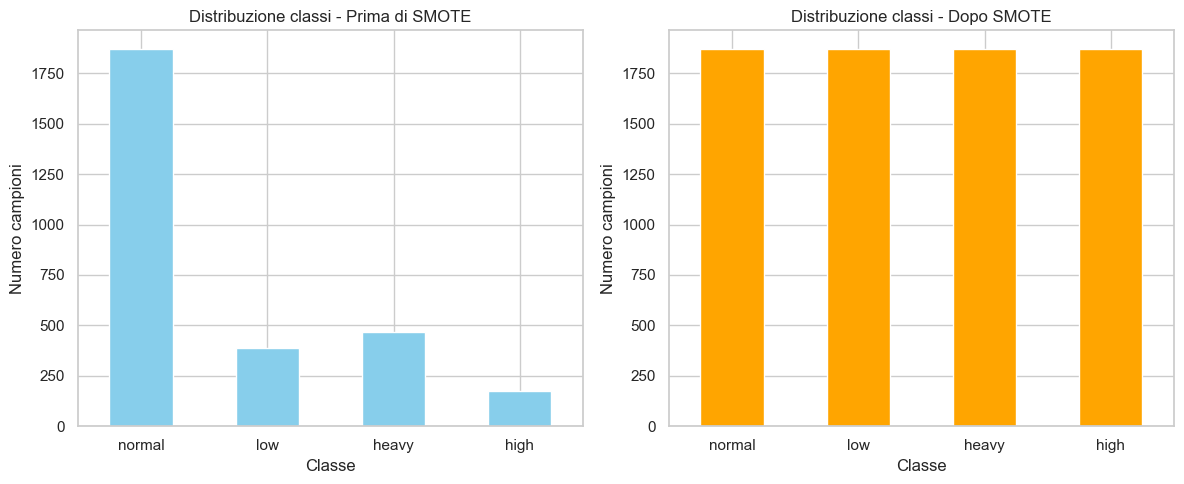

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Prima di SMOTE
y_train.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribuzione classi - Prima di SMOTE')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Numero campioni')
axes[0].set_xticklabels(["normal", "low", "heavy", "high"], rotation=0)

# Dopo SMOTE
y_train_rfe_smote.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Distribuzione classi - Dopo SMOTE')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Numero campioni')
axes[1].set_xticklabels(["normal", "low","heavy", "high"], rotation=0)

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       614
           1       0.96      0.97      0.96       151
           2       0.88      0.98      0.93       148
           3       0.84      0.93      0.88        56

    accuracy                           0.95       969
   macro avg       0.92      0.96      0.93       969
weighted avg       0.96      0.95      0.95       969

Accuracy: 0.9535603715170279


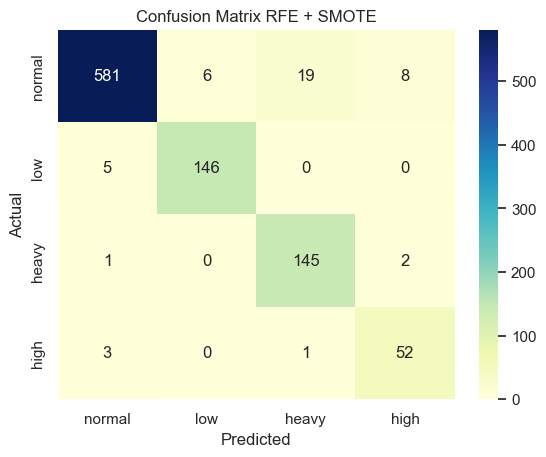

In [46]:
# Alleniamo il modello Random Forest sulle feature selezionate e dati bilanciati
rf_clf_rfe_smote = RandomForestClassifier(random_state=42)
rf_clf_rfe_smote.fit(X_train_rfe_smote, y_train_rfe_smote)

# Predizione e valutazione
y_pred_rfe_smote = rf_clf_rfe_smote.predict(X_test_rfe)
print(classification_report(y_test, y_pred_rfe_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_rfe_smote))

cm_rfe_smote = confusion_matrix(y_test, y_pred_rfe_smote)
sns.heatmap(cm_rfe_smote, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=["normal", "low", "heavy", "high"], 
            yticklabels=["normal", "low", "heavy", "high"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFE + SMOTE")
plt.show()

Analisi della Random Forest (RFE + SMOTE):
- Numero di alberi: 100
- Profondità media: 17.49
- Numero medio di foglie: 326.48
- Profondità massima: 23
- Profondità minima: 14


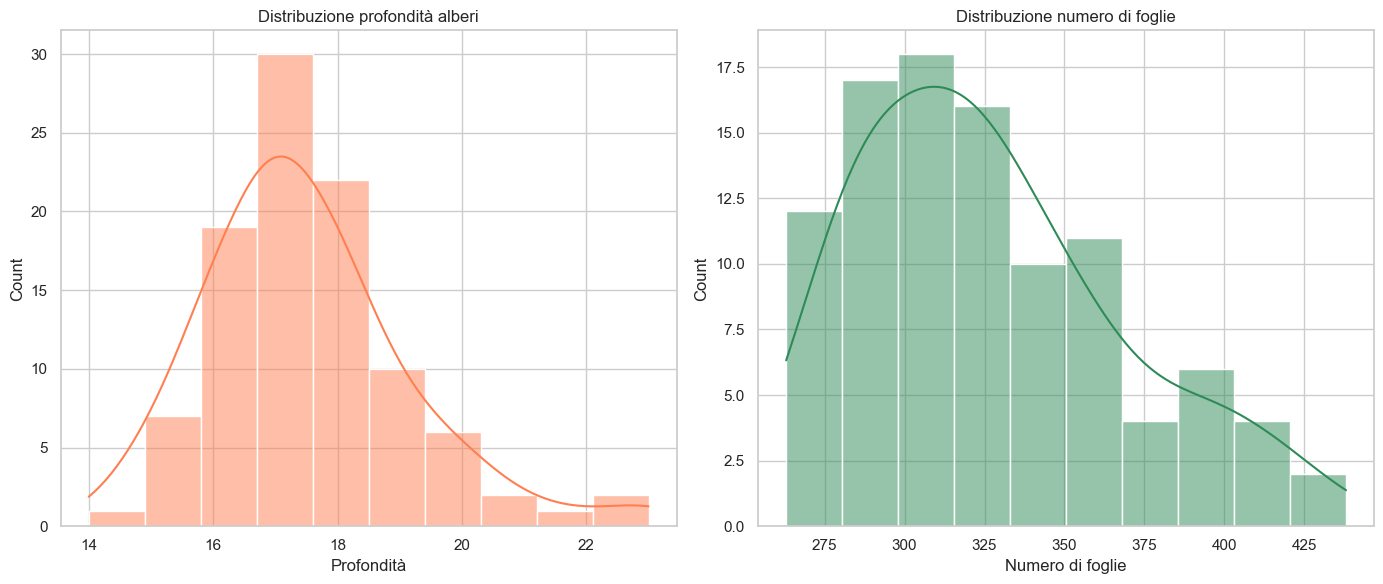

In [47]:
# Analisi struttura della foresta
depths = [tree.get_depth() for tree in rf_clf_rfe_smote.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf_rfe_smote.estimators_]

print("Analisi della Random Forest (RFE + SMOTE):")
print(f"- Numero di alberi: {len(rf_clf_rfe_smote.estimators_)}")
print(f"- Profondità media: {sum(depths)/len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves)/len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Plot distribuzioni
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="coral")
plt.title("Distribuzione profondità alberi")
plt.xlabel("Profondità")

plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="seagreen")
plt.title("Distribuzione numero di foglie")
plt.xlabel("Numero di foglie")

plt.tight_layout()
plt.show()


|--- CarCount <= 109.50
|   |--- TruckCount <= 17.50
|   |   |--- BusCount <= 14.50
|   |   |   |--- CarCount <= 82.50
|   |   |   |   |--- Energy_Consumption_L_h <= 5.16
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Energy_Consumption_L_h >  5.16
|   |   |   |   |   |--- BikeCount <= 21.50
|   |   |   |   |   |   |--- TruckCount <= 16.50
|   |   |   |   |   |   |   |--- Hour <= 1.50
|   |   |   |   |   |   |   |   |--- CarCount <= 80.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- CarCount >  80.50
|   |   |   |   |   |   |   |   |   |--- TruckCount <= 12.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- TruckCount >  12.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Hour >  1.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- TruckCount >  16.50
|   |   |   |   |   |   |   |--- CarCount <= 71.50
|   |   |   

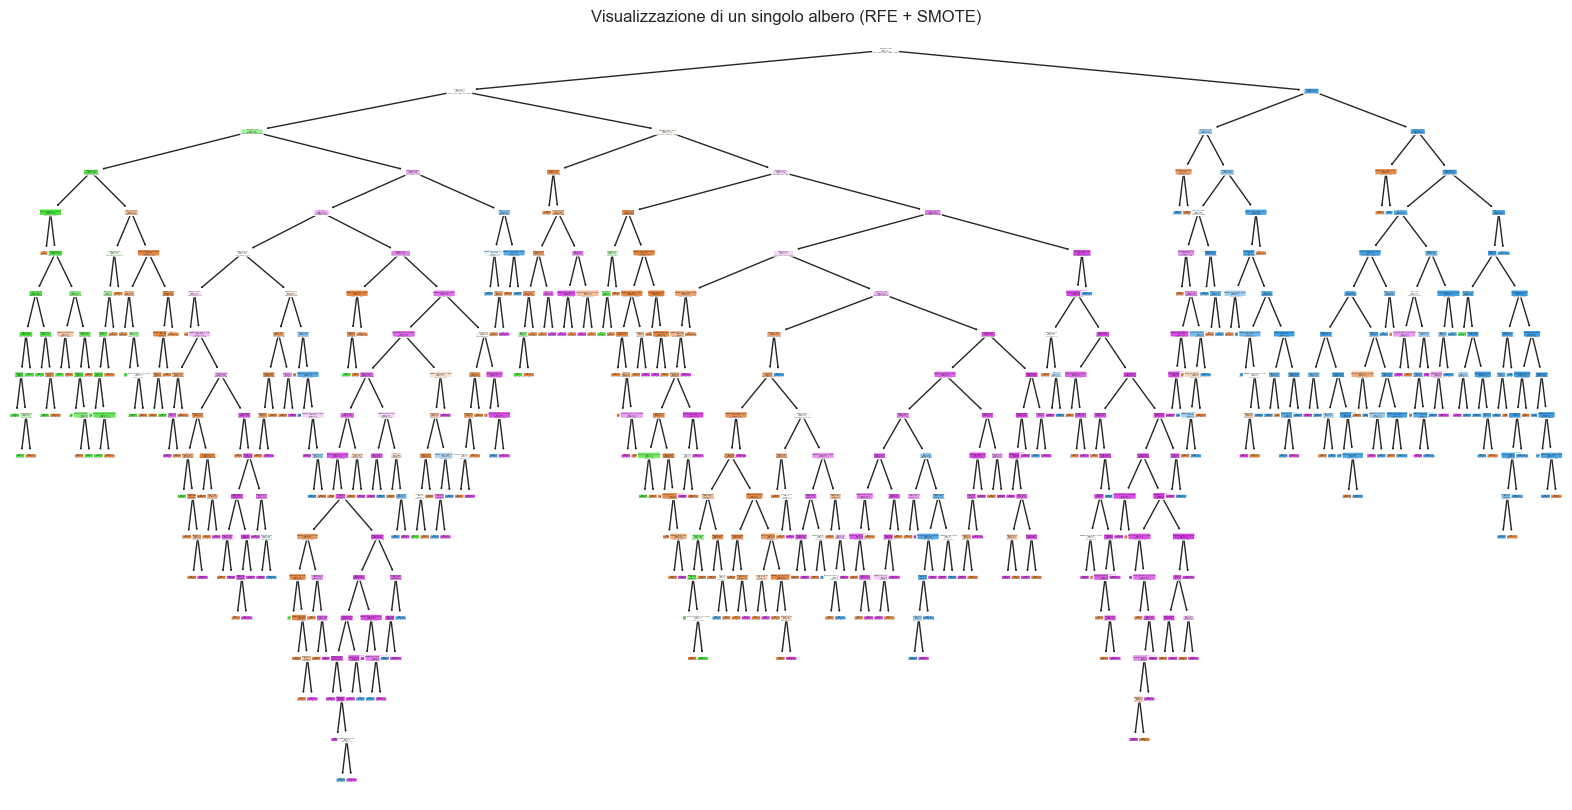

In [48]:

tree_rfe_smote = rf_clf_rfe_smote.estimators_[0] 

print(export_text(tree_rfe_smote, feature_names=list(X_train_rfe_smote.columns)))

plt.figure(figsize=(20,10))
plot_tree(tree_rfe_smote, feature_names=X_train_rfe_smote.columns, filled=True, rounded=True)
plt.title("Visualizzazione di un singolo albero (RFE + SMOTE)")
plt.show()

In [49]:
print("Train Accuracy:", rf_clf_rfe_smote.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", rf_clf_rfe_smote.score(X_test_rfe, y_test))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_clf_rfe_smote, X_train_rfe_smote, y_train_rfe_smote, cv=kfold)

print("\nK-Fold Cross Validation Results:")
print(f"- Accuracy per fold: {cv_scores}")
print(f"- Accuracy media: {cv_scores.mean():.2%}")
print(f"- Deviazione standard: {cv_scores.std():.2%}")

Train Accuracy: 1.0
Test Accuracy: 0.9535603715170279

K-Fold Cross Validation Results:
- Accuracy per fold: [0.98128342 0.98128342 0.97994652 0.98529412 0.98395722 0.98395722
 0.97188755 0.9772423  0.98125837 0.97858099]
- Accuracy media: 98.05%
- Deviazione standard: 0.37%


ANCORA!!!

In [50]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Definizione spazio iperparametri
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False] 
}

# StratifiedKFold per validazione
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Esecuzione del tuning
rf_random_search.fit(X_train_rfe_smote, y_train_rfe_smote)

# Migliori parametri trovati
print("Best Parameters:", rf_random_search.best_params_)
print("Best CV Score:", rf_random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': False, 'max_depth': 26, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 93}
Best CV Score: 0.9796680557294367


Train Accuracy (SMOTE): 1.0
Test Accuracy: 0.9607843137254902
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       614
           1       0.96      0.97      0.97       151
           2       0.91      0.97      0.93       148
           3       0.85      0.91      0.88        56

    accuracy                           0.96       969
   macro avg       0.93      0.95      0.94       969
weighted avg       0.96      0.96      0.96       969



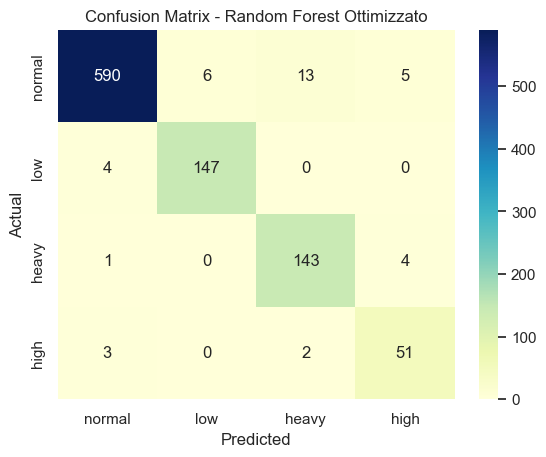

In [51]:
# Modello ottimizzato
best_rf = rf_random_search.best_estimator_

# Accuracy su training (SMOTE) e test
print("Train Accuracy (SMOTE):", best_rf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", best_rf.score(X_test_rfe, y_test))

# Report dettagliato
y_pred_test_opt = best_rf.predict(X_test_rfe)
print(classification_report(y_test, y_pred_test_opt))

# Confusion matrix
cm_opt = confusion_matrix(y_test, y_pred_test_opt)
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["normal", "low","heavy", "high"], 
            yticklabels=["normal", "low","heavy", "high"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Ottimizzato")
plt.show()

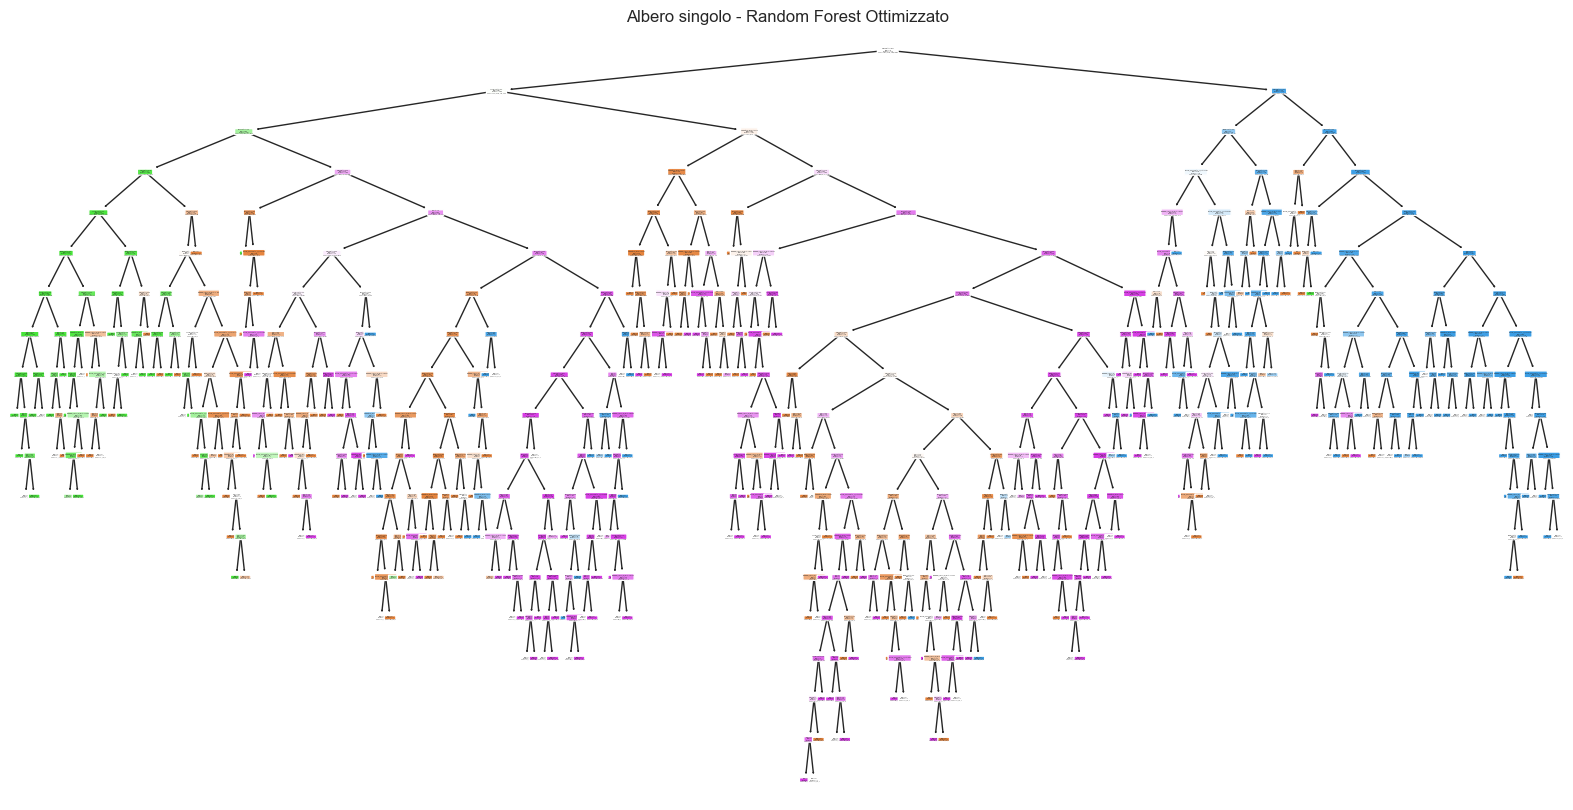

In [52]:
tree_opt = best_rf.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(tree_opt, feature_names=X_train_rfe_smote.columns, filled=True, rounded=True)
plt.title("Albero singolo - Random Forest Ottimizzato")
plt.show()

### CURVA AUC-ROC
La curva ROC AUC multiclasse è utile per visualizzare come il modello distingue tra ciascuna classe (Low, Medium, High).  La curva ROC AUC si calcola esclusivamente sui dati di test.

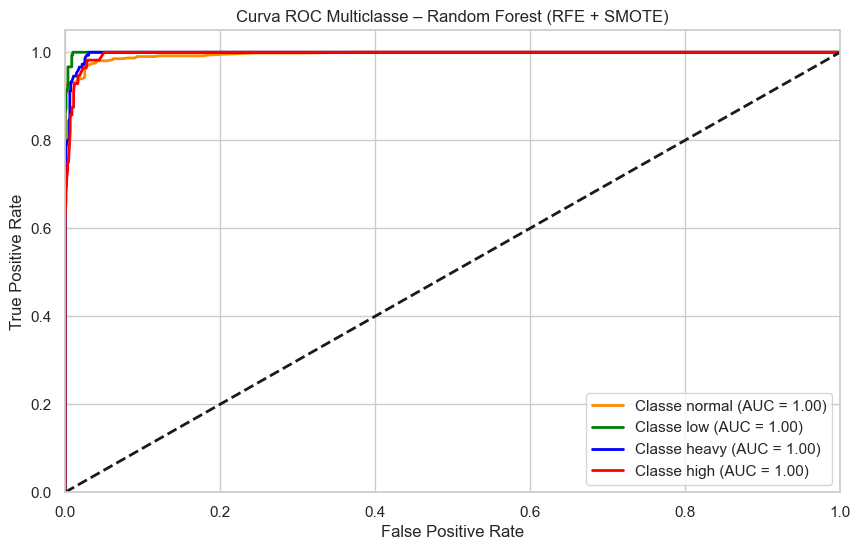

In [53]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarizza le etichette reali del test set
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

# Predizione probabilità con il modello addestrato su SMOTE + RFE
y_score = rf_clf_rfe_smote.predict_proba(X_test_rfe)  

# Calcolo ROC per ogni classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colori e nomi classi per il grafico
colors = cycle(['darkorange', 'green', 'blue', 'red'])
class_names = ["normal", "low", "heavy", "high"]

# Plot della curva ROC multiclass
plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse – Random Forest (RFE + SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Confronto con altri modelli

=== RANDOM FOREST ===
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       614
           1       0.96      0.97      0.97       151
           2       0.91      0.97      0.93       148
           3       0.85      0.91      0.88        56

    accuracy                           0.96       969
   macro avg       0.93      0.95      0.94       969
weighted avg       0.96      0.96      0.96       969

Train Accuracy: 1.0
Test Accuracy: 0.9607843137254902

=== SVM ===
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       614
           1       0.73      0.93      0.82       151
           2       0.80      0.98      0.88       148
           3       0.33      0.86      0.48        56

    accuracy                           0.80       969
   macro avg       0.71      0.87      0.75       969
weighted avg       0.87      0.80      0.81       969

Train Accuracy: 0.8990101658640984
Test A

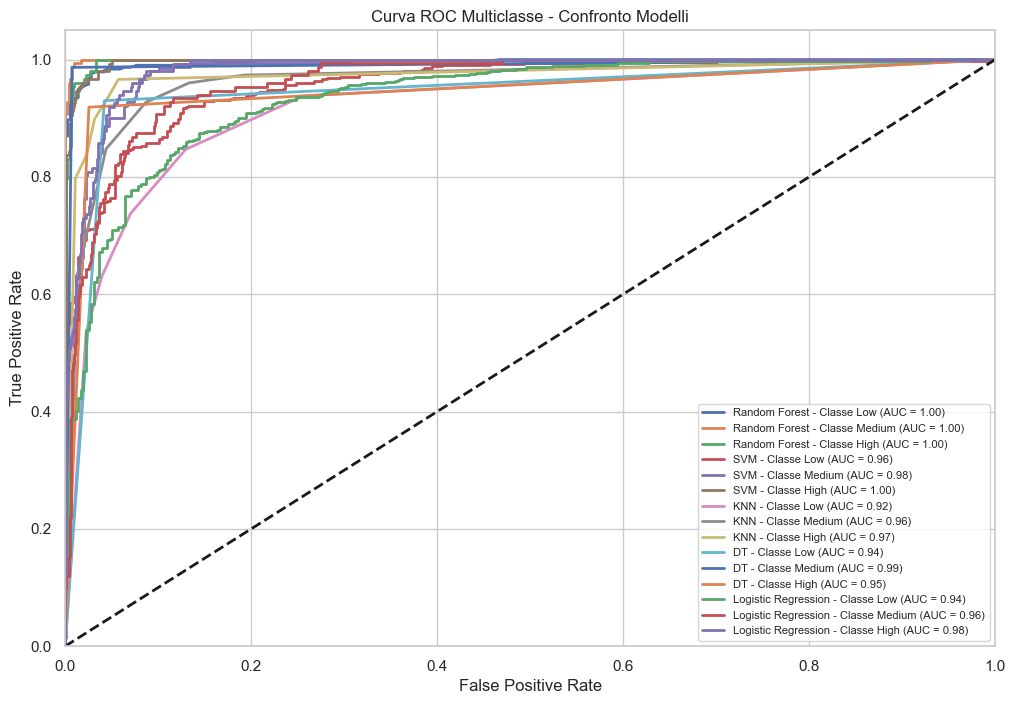

=== Valutazione Cross-Validation (5-Fold) ===
Random Forest: Accuracy media = 0.9797 (+/- 0.0026)
SVM: Accuracy media = 0.8910 (+/- 0.0065)
KNN: Accuracy media = 0.9208 (+/- 0.0068)
DT: Accuracy media = 0.9577 (+/- 0.0064)
Logistic Regression: Accuracy media = 0.8673 (+/- 0.0077)


In [54]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

# === DECISION TREE ===

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_dt = dt_clf.predict(X_test_rfe)


# === SVM ===
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_svm = svm_clf.predict(X_test_rfe)

# === KNN ===
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_knn = knn_clf.predict(X_test_rfe)


# === Report e Accuracy ===
print("=== RANDOM FOREST ===")
y_pred_test_opt = best_rf.predict(X_test_rfe)
print(classification_report(y_test, y_pred_test_opt))
print("Train Accuracy:", best_rf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_opt))

print("\n=== SVM ===")
print(classification_report(y_test, y_pred_svm))
print("Train Accuracy:", svm_clf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\n=== KNN ===")
print(classification_report(y_test, y_pred_knn))
print("Train Accuracy:", knn_clf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

print("\n=== DECISION TREE ===")
print(classification_report(y_test, y_pred_dt))
print("Train Accuracy:", dt_clf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))

# === LOGISTIC REGRESSION ===
logreg_clf = LogisticRegression(penalty='l2',C=1.0, solver='lbfgs', multi_class='multinomial', max_iter=1000, class_weight='balanced',random_state=42)
logreg_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_logreg = logreg_clf.predict(X_test_rfe)

print("\n=== LOGISTIC REGRESSION (L2) ===")
print(classification_report(y_test, y_pred_logreg))
print("Train Accuracy:", logreg_clf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", accuracy_score(y_test, y_pred_logreg))

# === ROC curve per modelli supervisionati ===

models = {
    'Random Forest': best_rf,
    'SVM': svm_clf,
    'KNN': knn_clf,
    'DT': dt_clf,
    'Logistic Regression': logreg_clf
}

y_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_bin.shape[1]
colors = cycle(['darkorange', 'green', 'blue'])
class_names = ['Low', 'Medium', 'High']

plt.figure(figsize=(12,8))

for name, model in models.items():
    y_score = model.predict_proba(X_test_rfe)
    roc_auc = dict()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2,
                 label=f'{name} - Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse - Confronto Modelli')
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.show()

# === CROSS-VALIDATION ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("=== Valutazione Cross-Validation (5-Fold) ===")
for name, model in models.items():
    scores = cross_val_score(model, X_train_rfe_smote, y_train_rfe_smote, cv=cv, scoring='accuracy')
    print(f"{name}: Accuracy media = {scores.mean():.4f} (+/- {scores.std():.4f})")

### Analisi delle Prestazioni dei Modelli di Classificazione

Sintesi dei Risultati

| Modello              | Train Accuracy | Test Accuracy | F1-Score (Macro Avg) | Commento Sintetico |
|----------------------|----------------|---------------|-----------------------|---------------------|
| **Random Forest**    | 1.00           | **0.96**      | **0.94**              | Modello solido, bilanciato e molto preciso. |
| **Decision Tree**    | 1.00           | 0.93          | 0.88                  | Ottimo, ma leggermente meno stabile di RF. |
| **Logistic Regression** | 0.86        | 0.82          | 0.76                  | Buona generalizzazione ma sotto i modelli ad albero. |
| **KNN**              | 0.95           | 0.80          | 0.73                  | Sensibile ai dati non bilanciati. |
| **SVM**              | 0.90           | 0.80          | 0.75                  | Problematico sulle classi meno rappresentate. |

---

Analisi Dettagliata

Random Forest
- **Punti di forza**:
  - Elevata accuratezza e F1-score su tutte le classi.
  - Eccellente generalizzazione: test accuracy quasi identica a quella di training.
- **Considerazioni**:
  - Modello migliore nel complesso.
  - Train accuracy al 100% → rischio overfitting da monitorare.

---

Decision Tree
- **Pro**:
  - Buone performance generali.
  - F1-score elevato anche su classi meno rappresentate.
- **Contro**:
  - Meno stabile di Random Forest.
  - Possibile overfitting (train acc. = 1.0).
- **Ideale per**: interpretabilità semplice.

---

SVM
- **Pro**:
  - Recall molto alto su classi 1, 2, 3.
- **Contro**:
  - Precisione bassa per classe 3 (0.33) → troppi falsi positivi.
  - Accuracy inferiore, soprattutto sulla classe 0.
- **Suggerimenti**:
  - Tuning dei parametri (`C`, `kernel`).
  - Bilanciamento dei dati.

---

K-Nearest Neighbors (KNN)
- **Pro**:
  - Buona capacità di richiamare le classi minoritarie.
- **Contro**:
  - F1 basso sulla classe 3 (0.46).
  - Sensibile alla scala delle variabili.
- **Suggerimenti**:
  - Normalizzazione dei dati.
  - Tuning di `k`.

---

Logistic Regression (L2)
- **Pro**:
  - Generalizza bene (train acc. ≈ test acc.).
- **Contro**:
  - Warning di **convergenza** → serve aumentare `max_iter`.
  - Prestazioni inferiori a RF e DT.
- **Suggerimenti**:
  - Pre-processing: normalizzazione/scaling.
  - Tuning di solver e parametri.

### Cosa conta di più nella predizione del traffico?

Dipende dal **target** del modello. In base a cosa vogliamo prevedere, cambiano le metriche e le priorità.

| **Target**                          | **Priorità**         |                                                                  |
|------------------------------------|----------------------|------------------------------------------------------------------------------|
| Tempo di percorrenza (regressione) | Generalizzazione     | Meglio avere una stima robusta, anche se non perfetta per ogni singolo caso |
| Congestione sì/no (classificazione)| Recall o F1-score    | Meglio evitare **falsi negativi** (es. dire “no traffico” quando invece c’è)|
| Incidenti / anomalie               | Recall alto          | Meglio **segnalare un rischio in più** che ignorarne uno reale              |



Train Accuracy: 0.8995
Test Accuracy: 0.8514
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       614
           1       0.71      0.84      0.77       151
           2       0.88      0.99      0.93       148
           3       0.54      0.79      0.64        56

    accuracy                           0.85       969
   macro avg       0.77      0.86      0.80       969
weighted avg       0.87      0.85      0.86       969



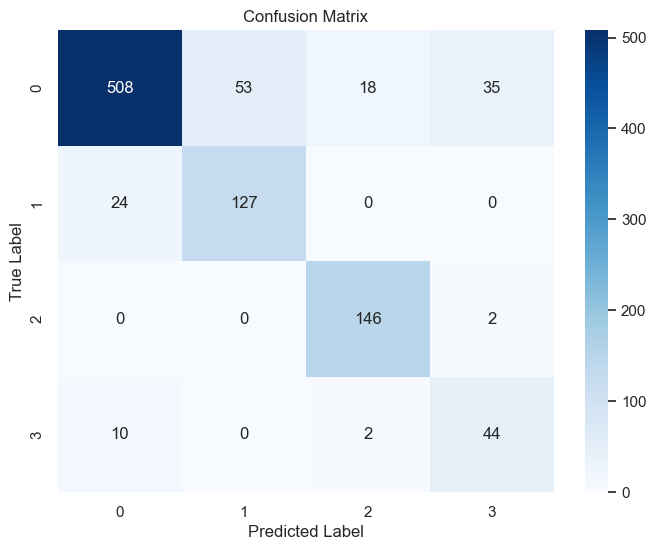

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Standardizzazione ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rfe_smote)
X_test_scaled = scaler.transform(X_test_rfe)

# === 2. Logistic Regression ===
logreg_clf = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)
logreg_clf.fit(X_train_scaled, y_train_rfe_smote)

# === 3. Predizione sul train set e calcolo accuracy ===
y_train_proba = logreg_clf.predict_proba(X_train_scaled)
threshold = 0.6

y_train_pred = []
for probs in y_train_proba:
    if probs[3] > threshold:
        y_train_pred.append(3)
    else:
        other_classes = [0, 1, 2]
        best_class = other_classes[np.argmax(probs[other_classes])]
        y_train_pred.append(best_class)
y_train_pred = np.array(y_train_pred)

train_accuracy = accuracy_score(y_train_rfe_smote, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

# === 4. Predizione sul test set e calcolo accuracy ===
y_test_proba = logreg_clf.predict_proba(X_test_scaled)

y_test_pred = []
for probs in y_test_proba:
    if probs[3] > threshold:
        y_test_pred.append(3)
    else:
        other_classes = [0, 1, 2]
        best_class = other_classes[np.argmax(probs[other_classes])]
        y_test_pred.append(best_class)
y_test_pred = np.array(y_test_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# === 5. Classification report ===
print(classification_report(y_test, y_test_pred))

# === 6. Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Predizione su nuovi dati

Distribuzione classi nel dataset:
Traffic Situation
0    3097
2     774
1     676
3     296
Name: count, dtype: int64


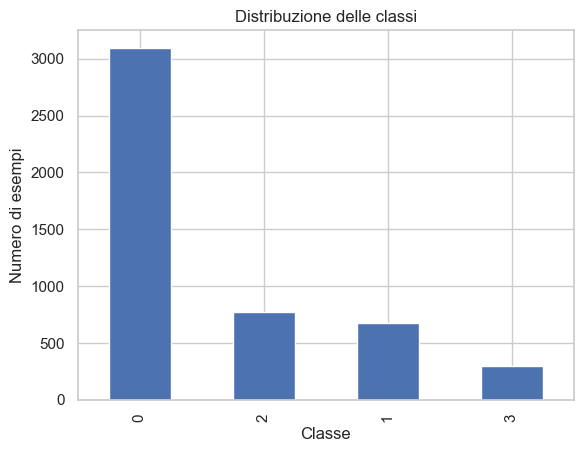


--- Esempi per classe vera 'normal' ---

Esempio indice 3258:
{'Emission_Levels_g_km': 169.0658290634969, 'Energy_Consumption_L_h': 20.020958898451816, 'CarCount': 15.0, 'BikeCount': 0.0, 'BusCount': 0.0, 'TruckCount': 32.0, 'Day': 12.0, 'Hour': 7.0, 'Congestion_Index': 0.22986723548198368}
Probabilità:
  normal: 0.9891
  low: 0.0093
  medium: 0.0000
  high: 0.0016
Classe predetta: normal

Esempio indice 1064:
{'Emission_Levels_g_km': 293.9120981798982, 'Energy_Consumption_L_h': 11.623895974096463, 'CarCount': 15.0, 'BikeCount': 2.0, 'BusCount': 2.0, 'TruckCount': 31.0, 'Day': 4.0, 'Hour': 16.0, 'Congestion_Index': 0.12670999776556666}
Probabilità:
  normal: 0.9919
  low: 0.0065
  medium: 0.0000
  high: 0.0016
Classe predetta: normal

Esempio indice 2773:
{'Emission_Levels_g_km': 445.1900535867899, 'Energy_Consumption_L_h': 20.27021267518983, 'CarCount': 99.0, 'BikeCount': 0.0, 'BusCount': 11.0, 'TruckCount': 21.0, 'Day': 10.0, 'Hour': 15.0, 'Congestion_Index': 0.6049842757762263}
Pro

In [56]:
import matplotlib.pyplot as plt

class_map = {0: "normal", 1: "low", 2: "medium", 3: "high"}
features= selected_features

# --- Visualizza distribuzione classi ---
print("Distribuzione classi nel dataset:")
print(dataset['Traffic Situation'].value_counts())

dataset['Traffic Situation'].value_counts().plot(kind='bar')
plt.title("Distribuzione delle classi")
plt.xlabel("Classe")
plt.ylabel("Numero di esempi")
plt.show()

# Uniamo tutto in un DataFrame per comodità
test_results = X_test.copy()
test_results['True_Class'] = y_test.values
test_results['Predicted_Class'] = y_test_pred
for i in range(4):
    test_results[f'Prob_{class_map[i]}'] = y_test_proba[:, i]

# Funzione per stampare esempi per una classe specifica
def print_examples_for_class(class_label, n=3):
    print(f"\n--- Esempi per classe vera '{class_map[class_label]}' ---")
    examples = test_results[test_results['True_Class'] == class_label].head(n)
    for idx, row in examples.iterrows():
        print(f"\nEsempio indice {idx}:")
        print(row[features].to_dict())
        print(f"Probabilità:")
        for c in range(4):
            print(f"  {class_map[c]}: {row[f'Prob_{class_map[c]}']:.4f}")
        pred = class_map[row['Predicted_Class']]
        print(f"Classe predetta: {pred}")

# Stampiamo 3 esempi per ogni classe
for cls in range(4):
    print_examples_for_class(cls, n=3)
